In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import r2_score
from termcolor import colored

In [2]:
SAVE_PATH = "./betaVAE_recon_results/"
BETAS = [0.1, 1, 2, 4, 8, 16]
LAMBDAS = [0.01, 0.05, 0.1, 0.5, 1]
LAMBDAS_0 = [0, 0.01, 0.05, 0.1, 0.5, 1]
NB_BINS = 20

## I. Disentanglement Scores

In [3]:
# Load the continuous and discrete ground truth factors for different beta values
# lambda = 0.01
train_latent_values_beta_01_lambda_001 = np.load(f'{SAVE_PATH}train_latent_values_beta_0.1_lambda_0.01.npy')
train_latent_values_beta_1_lambda_001 = np.load(f'{SAVE_PATH}train_latent_values_beta_1_lambda_0.01.npy')
train_latent_values_beta_2_lambda_001 = np.load(f'{SAVE_PATH}train_latent_values_beta_2_lambda_0.01.npy')
train_latent_values_beta_4_lambda_001 = np.load(f'{SAVE_PATH}train_latent_values_beta_4_lambda_0.01.npy')
train_latent_values_beta_8_lambda_001 = np.load(f'{SAVE_PATH}train_latent_values_beta_8_lambda_0.01.npy')
train_latent_values_beta_16_lambda_001 = np.load(f'{SAVE_PATH}train_latent_values_beta_16_lambda_0.01.npy')

train_latent_classes_beta_01_lambda_001 = np.load(f'{SAVE_PATH}train_latent_classes_beta_0.1_lambda_0.01.npy')
train_latent_classes_beta_1_lambda_001 = np.load(f'{SAVE_PATH}train_latent_classes_beta_1_lambda_0.01.npy')
train_latent_classes_beta_2_lambda_001 = np.load(f'{SAVE_PATH}train_latent_classes_beta_2_lambda_0.01.npy')
train_latent_classes_beta_4_lambda_001 = np.load(f'{SAVE_PATH}train_latent_classes_beta_4_lambda_0.01.npy')
train_latent_classes_beta_8_lambda_001 = np.load(f'{SAVE_PATH}train_latent_classes_beta_8_lambda_0.01.npy')
train_latent_classes_beta_16_lambda_001 = np.load(f'{SAVE_PATH}train_latent_classes_beta_16_lambda_0.01.npy')

val_latent_values_beta_01_lambda_001 = np.load(f'{SAVE_PATH}val_latent_values_beta_0.1_lambda_0.01.npy')
val_latent_values_beta_1_lambda_001 = np.load(f'{SAVE_PATH}val_latent_values_beta_1_lambda_0.01.npy')
val_latent_values_beta_2_lambda_001 = np.load(f'{SAVE_PATH}val_latent_values_beta_2_lambda_0.01.npy')
val_latent_values_beta_4_lambda_001 = np.load(f'{SAVE_PATH}val_latent_values_beta_4_lambda_0.01.npy')
val_latent_values_beta_8_lambda_001 = np.load(f'{SAVE_PATH}val_latent_values_beta_8_lambda_0.01.npy')
val_latent_values_beta_16_lambda_001 = np.load(f'{SAVE_PATH}val_latent_values_beta_16_lambda_0.01.npy')

val_latent_classes_beta_01_lambda_001 = np.load(f'{SAVE_PATH}val_latent_classes_beta_0.1_lambda_0.01.npy')
val_latent_classes_beta_1_lambda_001 = np.load(f'{SAVE_PATH}val_latent_classes_beta_1_lambda_0.01.npy')
val_latent_classes_beta_2_lambda_001 = np.load(f'{SAVE_PATH}val_latent_classes_beta_2_lambda_0.01.npy')
val_latent_classes_beta_4_lambda_001 = np.load(f'{SAVE_PATH}val_latent_classes_beta_4_lambda_0.01.npy')
val_latent_classes_beta_8_lambda_001 = np.load(f'{SAVE_PATH}val_latent_classes_beta_8_lambda_0.01.npy')
val_latent_classes_beta_16_lambda_001 = np.load(f'{SAVE_PATH}val_latent_classes_beta_16_lambda_0.01.npy')

# lambda = 0.05
train_latent_values_beta_01_lambda_005 = np.load(f'{SAVE_PATH}train_latent_values_beta_0.1_lambda_0.05.npy')
train_latent_values_beta_1_lambda_005 = np.load(f'{SAVE_PATH}train_latent_values_beta_1_lambda_0.05.npy')
train_latent_values_beta_2_lambda_005 = np.load(f'{SAVE_PATH}train_latent_values_beta_2_lambda_0.05.npy')
train_latent_values_beta_4_lambda_005 = np.load(f'{SAVE_PATH}train_latent_values_beta_4_lambda_0.05.npy')
train_latent_values_beta_8_lambda_005 = np.load(f'{SAVE_PATH}train_latent_values_beta_8_lambda_0.05.npy')
train_latent_values_beta_16_lambda_005 = np.load(f'{SAVE_PATH}train_latent_values_beta_16_lambda_0.05.npy')

train_latent_classes_beta_01_lambda_005 = np.load(f'{SAVE_PATH}train_latent_classes_beta_0.1_lambda_0.05.npy')
train_latent_classes_beta_1_lambda_005 = np.load(f'{SAVE_PATH}train_latent_classes_beta_1_lambda_0.05.npy')
train_latent_classes_beta_2_lambda_005 = np.load(f'{SAVE_PATH}train_latent_classes_beta_2_lambda_0.05.npy')
train_latent_classes_beta_4_lambda_005 = np.load(f'{SAVE_PATH}train_latent_classes_beta_4_lambda_0.05.npy')
train_latent_classes_beta_8_lambda_005 = np.load(f'{SAVE_PATH}train_latent_classes_beta_8_lambda_0.05.npy')
train_latent_classes_beta_16_lambda_005 = np.load(f'{SAVE_PATH}train_latent_classes_beta_16_lambda_0.05.npy')

val_latent_values_beta_01_lambda_005 = np.load(f'{SAVE_PATH}val_latent_values_beta_0.1_lambda_0.05.npy')
val_latent_values_beta_1_lambda_005 = np.load(f'{SAVE_PATH}val_latent_values_beta_1_lambda_0.05.npy')
val_latent_values_beta_2_lambda_005 = np.load(f'{SAVE_PATH}val_latent_values_beta_2_lambda_0.05.npy')
val_latent_values_beta_4_lambda_005 = np.load(f'{SAVE_PATH}val_latent_values_beta_4_lambda_0.05.npy')
val_latent_values_beta_8_lambda_005 = np.load(f'{SAVE_PATH}val_latent_values_beta_8_lambda_0.05.npy')
val_latent_values_beta_16_lambda_005 = np.load(f'{SAVE_PATH}val_latent_values_beta_16_lambda_0.05.npy')

val_latent_classes_beta_01_lambda_005 = np.load(f'{SAVE_PATH}val_latent_classes_beta_0.1_lambda_0.05.npy')
val_latent_classes_beta_1_lambda_005 = np.load(f'{SAVE_PATH}val_latent_classes_beta_1_lambda_0.05.npy')
val_latent_classes_beta_2_lambda_005 = np.load(f'{SAVE_PATH}val_latent_classes_beta_2_lambda_0.05.npy')
val_latent_classes_beta_4_lambda_005 = np.load(f'{SAVE_PATH}val_latent_classes_beta_4_lambda_0.05.npy')
val_latent_classes_beta_8_lambda_005 = np.load(f'{SAVE_PATH}val_latent_classes_beta_8_lambda_0.05.npy')
val_latent_classes_beta_16_lambda_005 = np.load(f'{SAVE_PATH}val_latent_classes_beta_16_lambda_0.05.npy')

# lambda = 0.1
train_latent_values_beta_01_lambda_01 = np.load(f'{SAVE_PATH}train_latent_values_beta_0.1_lambda_0.1.npy')
train_latent_values_beta_1_lambda_01 = np.load(f'{SAVE_PATH}train_latent_values_beta_1_lambda_0.1.npy')
train_latent_values_beta_2_lambda_01 = np.load(f'{SAVE_PATH}train_latent_values_beta_2_lambda_0.1.npy')
train_latent_values_beta_4_lambda_01 = np.load(f'{SAVE_PATH}train_latent_values_beta_4_lambda_0.1.npy')
train_latent_values_beta_8_lambda_01 = np.load(f'{SAVE_PATH}train_latent_values_beta_8_lambda_0.1.npy')
train_latent_values_beta_16_lambda_01 = np.load(f'{SAVE_PATH}train_latent_values_beta_16_lambda_0.1.npy')

train_latent_classes_beta_01_lambda_01 = np.load(f'{SAVE_PATH}train_latent_classes_beta_0.1_lambda_0.1.npy')
train_latent_classes_beta_1_lambda_01 = np.load(f'{SAVE_PATH}train_latent_classes_beta_1_lambda_0.1.npy')
train_latent_classes_beta_2_lambda_01 = np.load(f'{SAVE_PATH}train_latent_classes_beta_2_lambda_0.1.npy')
train_latent_classes_beta_4_lambda_01 = np.load(f'{SAVE_PATH}train_latent_classes_beta_4_lambda_0.1.npy')
train_latent_classes_beta_8_lambda_01 = np.load(f'{SAVE_PATH}train_latent_classes_beta_8_lambda_0.1.npy')
train_latent_classes_beta_16_lambda_01 = np.load(f'{SAVE_PATH}train_latent_classes_beta_16_lambda_0.1.npy')

val_latent_values_beta_01_lambda_01 = np.load(f'{SAVE_PATH}val_latent_values_beta_0.1_lambda_0.1.npy')
val_latent_values_beta_1_lambda_01 = np.load(f'{SAVE_PATH}val_latent_values_beta_1_lambda_0.1.npy')
val_latent_values_beta_2_lambda_01 = np.load(f'{SAVE_PATH}val_latent_values_beta_2_lambda_0.1.npy')
val_latent_values_beta_4_lambda_01 = np.load(f'{SAVE_PATH}val_latent_values_beta_4_lambda_0.1.npy')
val_latent_values_beta_8_lambda_01 = np.load(f'{SAVE_PATH}val_latent_values_beta_8_lambda_0.1.npy')
val_latent_values_beta_16_lambda_01 = np.load(f'{SAVE_PATH}val_latent_values_beta_16_lambda_0.1.npy')

val_latent_classes_beta_01_lambda_01 = np.load(f'{SAVE_PATH}val_latent_classes_beta_0.1_lambda_0.1.npy')
val_latent_classes_beta_1_lambda_01 = np.load(f'{SAVE_PATH}val_latent_classes_beta_1_lambda_0.1.npy')
val_latent_classes_beta_2_lambda_01 = np.load(f'{SAVE_PATH}val_latent_classes_beta_2_lambda_0.1.npy')
val_latent_classes_beta_4_lambda_01 = np.load(f'{SAVE_PATH}val_latent_classes_beta_4_lambda_0.1.npy')
val_latent_classes_beta_8_lambda_01 = np.load(f'{SAVE_PATH}val_latent_classes_beta_8_lambda_0.1.npy')
val_latent_classes_beta_16_lambda_01 = np.load(f'{SAVE_PATH}val_latent_classes_beta_16_lambda_0.1.npy')

# lambda = 0.5
train_latent_values_beta_01_lambda_05 = np.load(f'{SAVE_PATH}train_latent_values_beta_0.1_lambda_0.5.npy')
train_latent_values_beta_1_lambda_05 = np.load(f'{SAVE_PATH}train_latent_values_beta_1_lambda_0.5.npy')
train_latent_values_beta_2_lambda_05 = np.load(f'{SAVE_PATH}train_latent_values_beta_2_lambda_0.5.npy')
train_latent_values_beta_4_lambda_05 = np.load(f'{SAVE_PATH}train_latent_values_beta_4_lambda_0.5.npy')
train_latent_values_beta_8_lambda_05 = np.load(f'{SAVE_PATH}train_latent_values_beta_8_lambda_0.5.npy')
train_latent_values_beta_16_lambda_05 = np.load(f'{SAVE_PATH}train_latent_values_beta_16_lambda_0.5.npy')

train_latent_classes_beta_01_lambda_05 = np.load(f'{SAVE_PATH}train_latent_classes_beta_0.1_lambda_0.5.npy')
train_latent_classes_beta_1_lambda_05 = np.load(f'{SAVE_PATH}train_latent_classes_beta_1_lambda_0.5.npy')
train_latent_classes_beta_2_lambda_05 = np.load(f'{SAVE_PATH}train_latent_classes_beta_2_lambda_0.5.npy')
train_latent_classes_beta_4_lambda_05 = np.load(f'{SAVE_PATH}train_latent_classes_beta_4_lambda_0.5.npy')
train_latent_classes_beta_8_lambda_05 = np.load(f'{SAVE_PATH}train_latent_classes_beta_8_lambda_0.5.npy')
train_latent_classes_beta_16_lambda_05 = np.load(f'{SAVE_PATH}train_latent_classes_beta_16_lambda_0.5.npy')

val_latent_values_beta_01_lambda_05 = np.load(f'{SAVE_PATH}val_latent_values_beta_0.1_lambda_0.5.npy')
val_latent_values_beta_1_lambda_05 = np.load(f'{SAVE_PATH}val_latent_values_beta_1_lambda_0.5.npy')
val_latent_values_beta_2_lambda_05 = np.load(f'{SAVE_PATH}val_latent_values_beta_2_lambda_0.5.npy')
val_latent_values_beta_4_lambda_05 = np.load(f'{SAVE_PATH}val_latent_values_beta_4_lambda_0.5.npy')
val_latent_values_beta_8_lambda_05 = np.load(f'{SAVE_PATH}val_latent_values_beta_8_lambda_0.5.npy')
val_latent_values_beta_16_lambda_05 = np.load(f'{SAVE_PATH}val_latent_values_beta_16_lambda_0.5.npy')

val_latent_classes_beta_01_lambda_05 = np.load(f'{SAVE_PATH}val_latent_classes_beta_0.1_lambda_0.5.npy')
val_latent_classes_beta_1_lambda_05 = np.load(f'{SAVE_PATH}val_latent_classes_beta_1_lambda_0.5.npy')
val_latent_classes_beta_2_lambda_05 = np.load(f'{SAVE_PATH}val_latent_classes_beta_2_lambda_0.5.npy')
val_latent_classes_beta_4_lambda_05 = np.load(f'{SAVE_PATH}val_latent_classes_beta_4_lambda_0.5.npy')
val_latent_classes_beta_8_lambda_05 = np.load(f'{SAVE_PATH}val_latent_classes_beta_8_lambda_0.5.npy')
val_latent_classes_beta_16_lambda_05 = np.load(f'{SAVE_PATH}val_latent_classes_beta_16_lambda_0.5.npy')

# lambda = 1
train_latent_values_beta_01_lambda_1 = np.load(f'{SAVE_PATH}train_latent_values_beta_0.1_lambda_1.npy')
train_latent_values_beta_1_lambda_1 = np.load(f'{SAVE_PATH}train_latent_values_beta_1_lambda_1.npy')
train_latent_values_beta_2_lambda_1 = np.load(f'{SAVE_PATH}train_latent_values_beta_2_lambda_1.npy')
train_latent_values_beta_4_lambda_1 = np.load(f'{SAVE_PATH}train_latent_values_beta_4_lambda_1.npy')
train_latent_values_beta_8_lambda_1 = np.load(f'{SAVE_PATH}train_latent_values_beta_8_lambda_1.npy')
train_latent_values_beta_16_lambda_1 = np.load(f'{SAVE_PATH}train_latent_values_beta_16_lambda_1.npy')

train_latent_classes_beta_01_lambda_1 = np.load(f'{SAVE_PATH}train_latent_classes_beta_0.1_lambda_1.npy')
train_latent_classes_beta_1_lambda_1 = np.load(f'{SAVE_PATH}train_latent_classes_beta_1_lambda_1.npy')
train_latent_classes_beta_2_lambda_1 = np.load(f'{SAVE_PATH}train_latent_classes_beta_2_lambda_1.npy')
train_latent_classes_beta_4_lambda_1 = np.load(f'{SAVE_PATH}train_latent_classes_beta_4_lambda_1.npy')
train_latent_classes_beta_8_lambda_1 = np.load(f'{SAVE_PATH}train_latent_classes_beta_8_lambda_1.npy')
train_latent_classes_beta_16_lambda_1 = np.load(f'{SAVE_PATH}train_latent_classes_beta_16_lambda_1.npy')

val_latent_values_beta_01_lambda_1 = np.load(f'{SAVE_PATH}val_latent_values_beta_0.1_lambda_1.npy')
val_latent_values_beta_1_lambda_1 = np.load(f'{SAVE_PATH}val_latent_values_beta_1_lambda_1.npy')
val_latent_values_beta_2_lambda_1 = np.load(f'{SAVE_PATH}val_latent_values_beta_2_lambda_1.npy')
val_latent_values_beta_4_lambda_1 = np.load(f'{SAVE_PATH}val_latent_values_beta_4_lambda_1.npy')
val_latent_values_beta_8_lambda_1 = np.load(f'{SAVE_PATH}val_latent_values_beta_8_lambda_1.npy')
val_latent_values_beta_16_lambda_1 = np.load(f'{SAVE_PATH}val_latent_values_beta_16_lambda_1.npy')

val_latent_classes_beta_01_lambda_1 = np.load(f'{SAVE_PATH}val_latent_classes_beta_0.1_lambda_1.npy')
val_latent_classes_beta_1_lambda_1 = np.load(f'{SAVE_PATH}val_latent_classes_beta_1_lambda_1.npy')
val_latent_classes_beta_2_lambda_1 = np.load(f'{SAVE_PATH}val_latent_classes_beta_2_lambda_1.npy')
val_latent_classes_beta_4_lambda_1 = np.load(f'{SAVE_PATH}val_latent_classes_beta_4_lambda_1.npy')
val_latent_classes_beta_8_lambda_1 = np.load(f'{SAVE_PATH}val_latent_classes_beta_8_lambda_1.npy')
val_latent_classes_beta_16_lambda_1 = np.load(f'{SAVE_PATH}val_latent_classes_beta_16_lambda_1.npy')

In [4]:
# Load mu and std for different beta values
# lambda = 0.01
train_mu_beta_01_lambda_001 = np.load(f'{SAVE_PATH}train_mu_beta_0.1_lambda_0.01.npy')
train_mu_beta_1_lambda_001 = np.load(f'{SAVE_PATH}train_mu_beta_1_lambda_0.01.npy')
train_mu_beta_2_lambda_001 = np.load(f'{SAVE_PATH}train_mu_beta_2_lambda_0.01.npy')
train_mu_beta_4_lambda_001 = np.load(f'{SAVE_PATH}train_mu_beta_4_lambda_0.01.npy')
train_mu_beta_8_lambda_001 = np.load(f'{SAVE_PATH}train_mu_beta_8_lambda_0.01.npy')
train_mu_beta_16_lambda_001 = np.load(f'{SAVE_PATH}train_mu_beta_16_lambda_0.01.npy')

train_std_beta_01_lambda_001 = np.load(f'{SAVE_PATH}train_std_beta_0.1_lambda_0.01.npy')
train_std_beta_1_lambda_001 = np.load(f'{SAVE_PATH}train_std_beta_1_lambda_0.01.npy')
train_std_beta_2_lambda_001 = np.load(f'{SAVE_PATH}train_std_beta_2_lambda_0.01.npy')
train_std_beta_4_lambda_001 = np.load(f'{SAVE_PATH}train_std_beta_4_lambda_0.01.npy')
train_std_beta_8_lambda_001 = np.load(f'{SAVE_PATH}train_std_beta_8_lambda_0.01.npy')
train_std_beta_16_lambda_001 = np.load(f'{SAVE_PATH}train_std_beta_16_lambda_0.01.npy')

val_mu_beta_01_lambda_001 = np.load(f'{SAVE_PATH}val_mu_beta_0.1_lambda_0.01.npy')
val_mu_beta_1_lambda_001 = np.load(f'{SAVE_PATH}val_mu_beta_1_lambda_0.01.npy')
val_mu_beta_2_lambda_001 = np.load(f'{SAVE_PATH}val_mu_beta_2_lambda_0.01.npy')
val_mu_beta_4_lambda_001 = np.load(f'{SAVE_PATH}val_mu_beta_4_lambda_0.01.npy')
val_mu_beta_8_lambda_001 = np.load(f'{SAVE_PATH}val_mu_beta_8_lambda_0.01.npy')
val_mu_beta_16_lambda_001 = np.load(f'{SAVE_PATH}val_mu_beta_16_lambda_0.01.npy')

val_std_beta_01_lambda_001 = np.load(f'{SAVE_PATH}val_std_beta_0.1_lambda_0.01.npy')
val_std_beta_1_lambda_001 = np.load(f'{SAVE_PATH}val_std_beta_1_lambda_0.01.npy')
val_std_beta_2_lambda_001 = np.load(f'{SAVE_PATH}val_std_beta_2_lambda_0.01.npy')
val_std_beta_4_lambda_001 = np.load(f'{SAVE_PATH}val_std_beta_4_lambda_0.01.npy')
val_std_beta_8_lambda_001 = np.load(f'{SAVE_PATH}val_std_beta_8_lambda_0.01.npy')
val_std_beta_16_lambda_001 = np.load(f'{SAVE_PATH}val_std_beta_16_lambda_0.01.npy')

# lambda = 0.05
train_mu_beta_01_lambda_005 = np.load(f'{SAVE_PATH}train_mu_beta_0.1_lambda_0.05.npy')
train_mu_beta_1_lambda_005 = np.load(f'{SAVE_PATH}train_mu_beta_1_lambda_0.05.npy')
train_mu_beta_2_lambda_005 = np.load(f'{SAVE_PATH}train_mu_beta_2_lambda_0.05.npy')
train_mu_beta_4_lambda_005 = np.load(f'{SAVE_PATH}train_mu_beta_4_lambda_0.05.npy')
train_mu_beta_8_lambda_005 = np.load(f'{SAVE_PATH}train_mu_beta_8_lambda_0.05.npy')
train_mu_beta_16_lambda_005 = np.load(f'{SAVE_PATH}train_mu_beta_16_lambda_0.05.npy')

train_std_beta_01_lambda_005 = np.load(f'{SAVE_PATH}train_std_beta_0.1_lambda_0.05.npy')
train_std_beta_1_lambda_005 = np.load(f'{SAVE_PATH}train_std_beta_1_lambda_0.05.npy')
train_std_beta_2_lambda_005 = np.load(f'{SAVE_PATH}train_std_beta_2_lambda_0.05.npy')
train_std_beta_4_lambda_005 = np.load(f'{SAVE_PATH}train_std_beta_4_lambda_0.05.npy')
train_std_beta_8_lambda_005 = np.load(f'{SAVE_PATH}train_std_beta_8_lambda_0.05.npy')
train_std_beta_16_lambda_005 = np.load(f'{SAVE_PATH}train_std_beta_16_lambda_0.05.npy')

val_mu_beta_01_lambda_005 = np.load(f'{SAVE_PATH}val_mu_beta_0.1_lambda_0.05.npy')
val_mu_beta_1_lambda_005 = np.load(f'{SAVE_PATH}val_mu_beta_1_lambda_0.05.npy')
val_mu_beta_2_lambda_005 = np.load(f'{SAVE_PATH}val_mu_beta_2_lambda_0.05.npy')
val_mu_beta_4_lambda_005 = np.load(f'{SAVE_PATH}val_mu_beta_4_lambda_0.05.npy')
val_mu_beta_8_lambda_005 = np.load(f'{SAVE_PATH}val_mu_beta_8_lambda_0.05.npy')
val_mu_beta_16_lambda_005 = np.load(f'{SAVE_PATH}val_mu_beta_16_lambda_0.05.npy')

val_std_beta_01_lambda_005 = np.load(f'{SAVE_PATH}val_std_beta_0.1_lambda_0.05.npy')
val_std_beta_1_lambda_005 = np.load(f'{SAVE_PATH}val_std_beta_1_lambda_0.05.npy')
val_std_beta_2_lambda_005 = np.load(f'{SAVE_PATH}val_std_beta_2_lambda_0.05.npy')
val_std_beta_4_lambda_005 = np.load(f'{SAVE_PATH}val_std_beta_4_lambda_0.05.npy')
val_std_beta_8_lambda_005 = np.load(f'{SAVE_PATH}val_std_beta_8_lambda_0.05.npy')
val_std_beta_16_lambda_005 = np.load(f'{SAVE_PATH}val_std_beta_16_lambda_0.05.npy')

# lambda = 0.1
train_mu_beta_01_lambda_01 = np.load(f'{SAVE_PATH}train_mu_beta_0.1_lambda_0.1.npy')
train_mu_beta_1_lambda_01 = np.load(f'{SAVE_PATH}train_mu_beta_1_lambda_0.1.npy')
train_mu_beta_2_lambda_01 = np.load(f'{SAVE_PATH}train_mu_beta_2_lambda_0.1.npy')
train_mu_beta_4_lambda_01 = np.load(f'{SAVE_PATH}train_mu_beta_4_lambda_0.1.npy')
train_mu_beta_8_lambda_01 = np.load(f'{SAVE_PATH}train_mu_beta_8_lambda_0.1.npy')
train_mu_beta_16_lambda_01 = np.load(f'{SAVE_PATH}train_mu_beta_16_lambda_0.1.npy')

train_std_beta_01_lambda_01 = np.load(f'{SAVE_PATH}train_std_beta_0.1_lambda_0.1.npy')
train_std_beta_1_lambda_01 = np.load(f'{SAVE_PATH}train_std_beta_1_lambda_0.1.npy')
train_std_beta_2_lambda_01 = np.load(f'{SAVE_PATH}train_std_beta_2_lambda_0.1.npy')
train_std_beta_4_lambda_01 = np.load(f'{SAVE_PATH}train_std_beta_4_lambda_0.1.npy')
train_std_beta_8_lambda_01 = np.load(f'{SAVE_PATH}train_std_beta_8_lambda_0.1.npy')
train_std_beta_16_lambda_01 = np.load(f'{SAVE_PATH}train_std_beta_16_lambda_0.1.npy')

val_mu_beta_01_lambda_01 = np.load(f'{SAVE_PATH}val_mu_beta_0.1_lambda_0.1.npy')
val_mu_beta_1_lambda_01 = np.load(f'{SAVE_PATH}val_mu_beta_1_lambda_0.1.npy')
val_mu_beta_2_lambda_01 = np.load(f'{SAVE_PATH}val_mu_beta_2_lambda_0.1.npy')
val_mu_beta_4_lambda_01 = np.load(f'{SAVE_PATH}val_mu_beta_4_lambda_0.1.npy')
val_mu_beta_8_lambda_01 = np.load(f'{SAVE_PATH}val_mu_beta_8_lambda_0.1.npy')
val_mu_beta_16_lambda_01 = np.load(f'{SAVE_PATH}val_mu_beta_16_lambda_0.1.npy')

val_std_beta_01_lambda_01 = np.load(f'{SAVE_PATH}val_std_beta_0.1_lambda_0.1.npy')
val_std_beta_1_lambda_01 = np.load(f'{SAVE_PATH}val_std_beta_1_lambda_0.1.npy')
val_std_beta_2_lambda_01 = np.load(f'{SAVE_PATH}val_std_beta_2_lambda_0.1.npy')
val_std_beta_4_lambda_01 = np.load(f'{SAVE_PATH}val_std_beta_4_lambda_0.1.npy')
val_std_beta_8_lambda_01 = np.load(f'{SAVE_PATH}val_std_beta_8_lambda_0.1.npy')
val_std_beta_16_lambda_01 = np.load(f'{SAVE_PATH}val_std_beta_16_lambda_0.1.npy')

# lambda = 0.5
train_mu_beta_01_lambda_05 = np.load(f'{SAVE_PATH}train_mu_beta_0.1_lambda_0.5.npy')
train_mu_beta_1_lambda_05 = np.load(f'{SAVE_PATH}train_mu_beta_1_lambda_0.5.npy')
train_mu_beta_2_lambda_05 = np.load(f'{SAVE_PATH}train_mu_beta_2_lambda_0.5.npy')
train_mu_beta_4_lambda_05 = np.load(f'{SAVE_PATH}train_mu_beta_4_lambda_0.5.npy')
train_mu_beta_8_lambda_05 = np.load(f'{SAVE_PATH}train_mu_beta_8_lambda_0.5.npy')
train_mu_beta_16_lambda_05 = np.load(f'{SAVE_PATH}train_mu_beta_16_lambda_0.5.npy')

train_std_beta_01_lambda_05 = np.load(f'{SAVE_PATH}train_std_beta_0.1_lambda_0.5.npy')
train_std_beta_1_lambda_05 = np.load(f'{SAVE_PATH}train_std_beta_1_lambda_0.5.npy')
train_std_beta_2_lambda_05 = np.load(f'{SAVE_PATH}train_std_beta_2_lambda_0.5.npy')
train_std_beta_4_lambda_05 = np.load(f'{SAVE_PATH}train_std_beta_4_lambda_0.5.npy')
train_std_beta_8_lambda_05 = np.load(f'{SAVE_PATH}train_std_beta_8_lambda_0.5.npy')
train_std_beta_16_lambda_05 = np.load(f'{SAVE_PATH}train_std_beta_16_lambda_0.5.npy')

val_mu_beta_01_lambda_05 = np.load(f'{SAVE_PATH}val_mu_beta_0.1_lambda_0.5.npy')
val_mu_beta_1_lambda_05 = np.load(f'{SAVE_PATH}val_mu_beta_1_lambda_0.5.npy')
val_mu_beta_2_lambda_05 = np.load(f'{SAVE_PATH}val_mu_beta_2_lambda_0.5.npy')
val_mu_beta_4_lambda_05 = np.load(f'{SAVE_PATH}val_mu_beta_4_lambda_0.5.npy')
val_mu_beta_8_lambda_05 = np.load(f'{SAVE_PATH}val_mu_beta_8_lambda_0.5.npy')
val_mu_beta_16_lambda_05 = np.load(f'{SAVE_PATH}val_mu_beta_16_lambda_0.5.npy')

val_std_beta_01_lambda_05 = np.load(f'{SAVE_PATH}val_std_beta_0.1_lambda_0.5.npy')
val_std_beta_1_lambda_05 = np.load(f'{SAVE_PATH}val_std_beta_1_lambda_0.5.npy')
val_std_beta_2_lambda_05 = np.load(f'{SAVE_PATH}val_std_beta_2_lambda_0.5.npy')
val_std_beta_4_lambda_05 = np.load(f'{SAVE_PATH}val_std_beta_4_lambda_0.5.npy')
val_std_beta_8_lambda_05 = np.load(f'{SAVE_PATH}val_std_beta_8_lambda_0.5.npy')
val_std_beta_16_lambda_05 = np.load(f'{SAVE_PATH}val_std_beta_16_lambda_0.5.npy')

# lambda = 1
train_mu_beta_01_lambda_1 = np.load(f'{SAVE_PATH}train_mu_beta_0.1_lambda_1.npy')
train_mu_beta_1_lambda_1 = np.load(f'{SAVE_PATH}train_mu_beta_1_lambda_1.npy')
train_mu_beta_2_lambda_1 = np.load(f'{SAVE_PATH}train_mu_beta_2_lambda_1.npy')
train_mu_beta_4_lambda_1 = np.load(f'{SAVE_PATH}train_mu_beta_4_lambda_1.npy')
train_mu_beta_8_lambda_1 = np.load(f'{SAVE_PATH}train_mu_beta_8_lambda_1.npy')
train_mu_beta_16_lambda_1 = np.load(f'{SAVE_PATH}train_mu_beta_16_lambda_1.npy')

train_std_beta_01_lambda_1 = np.load(f'{SAVE_PATH}train_std_beta_0.1_lambda_1.npy')
train_std_beta_1_lambda_1 = np.load(f'{SAVE_PATH}train_std_beta_1_lambda_1.npy')
train_std_beta_2_lambda_1 = np.load(f'{SAVE_PATH}train_std_beta_2_lambda_1.npy')
train_std_beta_4_lambda_1 = np.load(f'{SAVE_PATH}train_std_beta_4_lambda_1.npy')
train_std_beta_8_lambda_1 = np.load(f'{SAVE_PATH}train_std_beta_8_lambda_1.npy')
train_std_beta_16_lambda_1 = np.load(f'{SAVE_PATH}train_std_beta_16_lambda_1.npy')

val_mu_beta_01_lambda_1 = np.load(f'{SAVE_PATH}val_mu_beta_0.1_lambda_1.npy')
val_mu_beta_1_lambda_1 = np.load(f'{SAVE_PATH}val_mu_beta_1_lambda_1.npy')
val_mu_beta_2_lambda_1 = np.load(f'{SAVE_PATH}val_mu_beta_2_lambda_1.npy')
val_mu_beta_4_lambda_1 = np.load(f'{SAVE_PATH}val_mu_beta_4_lambda_1.npy')
val_mu_beta_8_lambda_1 = np.load(f'{SAVE_PATH}val_mu_beta_8_lambda_1.npy')
val_mu_beta_16_lambda_1 = np.load(f'{SAVE_PATH}val_mu_beta_16_lambda_1.npy')

val_std_beta_01_lambda_1 = np.load(f'{SAVE_PATH}val_std_beta_0.1_lambda_1.npy')
val_std_beta_1_lambda_1 = np.load(f'{SAVE_PATH}val_std_beta_1_lambda_1.npy')
val_std_beta_2_lambda_1 = np.load(f'{SAVE_PATH}val_std_beta_2_lambda_1.npy')
val_std_beta_4_lambda_1 = np.load(f'{SAVE_PATH}val_std_beta_4_lambda_1.npy')
val_std_beta_8_lambda_1 = np.load(f'{SAVE_PATH}val_std_beta_8_lambda_1.npy')
val_std_beta_16_lambda_1 = np.load(f'{SAVE_PATH}val_std_beta_16_lambda_1.npy')

In [5]:
# Reparameterization trick
def reparameterize(mu, std):
    return mu + std * np.random.randn(*mu.shape)

# Compute latent variables for each beta value explicitly
# lambda = 0.01
train_latent_variables_beta_01_lambda_001 = reparameterize(train_mu_beta_01_lambda_001, train_std_beta_01_lambda_001)
train_latent_variables_beta_1_lambda_001 = reparameterize(train_mu_beta_1_lambda_001, train_std_beta_1_lambda_001)
train_latent_variables_beta_2_lambda_001 = reparameterize(train_mu_beta_2_lambda_001, train_std_beta_2_lambda_001)
train_latent_variables_beta_4_lambda_001 = reparameterize(train_mu_beta_4_lambda_001, train_std_beta_4_lambda_001)
train_latent_variables_beta_8_lambda_001 = reparameterize(train_mu_beta_8_lambda_001, train_std_beta_8_lambda_001)
train_latent_variables_beta_16_lambda_001 = reparameterize(train_mu_beta_16_lambda_001, train_std_beta_16_lambda_001)

val_latent_variables_beta_01_lambda_001 = reparameterize(val_mu_beta_01_lambda_001, val_std_beta_01_lambda_001)
val_latent_variables_beta_1_lambda_001 = reparameterize(val_mu_beta_1_lambda_001, val_std_beta_1_lambda_001)
val_latent_variables_beta_2_lambda_001 = reparameterize(val_mu_beta_2_lambda_001, val_std_beta_2_lambda_001)
val_latent_variables_beta_4_lambda_001 = reparameterize(val_mu_beta_4_lambda_001, val_std_beta_4_lambda_001)
val_latent_variables_beta_8_lambda_001 = reparameterize(val_mu_beta_8_lambda_001, val_std_beta_8_lambda_001)
val_latent_variables_beta_16_lambda_001 = reparameterize(val_mu_beta_16_lambda_001, val_std_beta_16_lambda_001)

# lambda = 0.05
train_latent_variables_beta_01_lambda_005 = reparameterize(train_mu_beta_01_lambda_005, train_std_beta_01_lambda_005)
train_latent_variables_beta_1_lambda_005 = reparameterize(train_mu_beta_1_lambda_005, train_std_beta_1_lambda_005)
train_latent_variables_beta_2_lambda_005 = reparameterize(train_mu_beta_2_lambda_005, train_std_beta_2_lambda_005)
train_latent_variables_beta_4_lambda_005 = reparameterize(train_mu_beta_4_lambda_005, train_std_beta_4_lambda_005)
train_latent_variables_beta_8_lambda_005 = reparameterize(train_mu_beta_8_lambda_005, train_std_beta_8_lambda_005)
train_latent_variables_beta_16_lambda_005 = reparameterize(train_mu_beta_16_lambda_005, train_std_beta_16_lambda_005)

val_latent_variables_beta_01_lambda_005 = reparameterize(val_mu_beta_01_lambda_005, val_std_beta_01_lambda_005)
val_latent_variables_beta_1_lambda_005 = reparameterize(val_mu_beta_1_lambda_005, val_std_beta_1_lambda_005)
val_latent_variables_beta_2_lambda_005 = reparameterize(val_mu_beta_2_lambda_005, val_std_beta_2_lambda_005)
val_latent_variables_beta_4_lambda_005 = reparameterize(val_mu_beta_4_lambda_005, val_std_beta_4_lambda_005)
val_latent_variables_beta_8_lambda_005 = reparameterize(val_mu_beta_8_lambda_005, val_std_beta_8_lambda_005)
val_latent_variables_beta_16_lambda_005 = reparameterize(val_mu_beta_16_lambda_005, val_std_beta_16_lambda_005)

# lambda = 0.1
train_latent_variables_beta_01_lambda_01 = reparameterize(train_mu_beta_01_lambda_01, train_std_beta_01_lambda_01)
train_latent_variables_beta_1_lambda_01 = reparameterize(train_mu_beta_1_lambda_01, train_std_beta_1_lambda_01)
train_latent_variables_beta_2_lambda_01 = reparameterize(train_mu_beta_2_lambda_01, train_std_beta_2_lambda_01)
train_latent_variables_beta_4_lambda_01 = reparameterize(train_mu_beta_4_lambda_01, train_std_beta_4_lambda_01)
train_latent_variables_beta_8_lambda_01 = reparameterize(train_mu_beta_8_lambda_01, train_std_beta_8_lambda_01)
train_latent_variables_beta_16_lambda_01 = reparameterize(train_mu_beta_16_lambda_01, train_std_beta_16_lambda_01)

val_latent_variables_beta_01_lambda_01 = reparameterize(val_mu_beta_01_lambda_01, val_std_beta_01_lambda_01)
val_latent_variables_beta_1_lambda_01 = reparameterize(val_mu_beta_1_lambda_01, val_std_beta_1_lambda_01)
val_latent_variables_beta_2_lambda_01 = reparameterize(val_mu_beta_2_lambda_01, val_std_beta_2_lambda_01)
val_latent_variables_beta_4_lambda_01 = reparameterize(val_mu_beta_4_lambda_01, val_std_beta_4_lambda_01)
val_latent_variables_beta_8_lambda_01 = reparameterize(val_mu_beta_8_lambda_01, val_std_beta_8_lambda_01)
val_latent_variables_beta_16_lambda_01 = reparameterize(val_mu_beta_16_lambda_01, val_std_beta_16_lambda_01)

# lambda = 0.5
train_latent_variables_beta_01_lambda_05 = reparameterize(train_mu_beta_01_lambda_05, train_std_beta_01_lambda_05)
train_latent_variables_beta_1_lambda_05 = reparameterize(train_mu_beta_1_lambda_05, train_std_beta_1_lambda_05)
train_latent_variables_beta_2_lambda_05 = reparameterize(train_mu_beta_2_lambda_05, train_std_beta_2_lambda_05)
train_latent_variables_beta_4_lambda_05 = reparameterize(train_mu_beta_4_lambda_05, train_std_beta_4_lambda_05)
train_latent_variables_beta_8_lambda_05 = reparameterize(train_mu_beta_8_lambda_05, train_std_beta_8_lambda_05)
train_latent_variables_beta_16_lambda_05 = reparameterize(train_mu_beta_16_lambda_05, train_std_beta_16_lambda_05)

val_latent_variables_beta_01_lambda_05 = reparameterize(val_mu_beta_01_lambda_05, val_std_beta_01_lambda_05)
val_latent_variables_beta_1_lambda_05 = reparameterize(val_mu_beta_1_lambda_05, val_std_beta_1_lambda_05)
val_latent_variables_beta_2_lambda_05 = reparameterize(val_mu_beta_2_lambda_05, val_std_beta_2_lambda_05)
val_latent_variables_beta_4_lambda_05 = reparameterize(val_mu_beta_4_lambda_05, val_std_beta_4_lambda_05)
val_latent_variables_beta_8_lambda_05 = reparameterize(val_mu_beta_8_lambda_05, val_std_beta_8_lambda_05)
val_latent_variables_beta_16_lambda_05 = reparameterize(val_mu_beta_16_lambda_05, val_std_beta_16_lambda_05)

# lambda = 1
train_latent_variables_beta_01_lambda_1 = reparameterize(train_mu_beta_01_lambda_1, train_std_beta_01_lambda_1)
train_latent_variables_beta_1_lambda_1 = reparameterize(train_mu_beta_1_lambda_1, train_std_beta_1_lambda_1)
train_latent_variables_beta_2_lambda_1 = reparameterize(train_mu_beta_2_lambda_1, train_std_beta_2_lambda_1)
train_latent_variables_beta_4_lambda_1 = reparameterize(train_mu_beta_4_lambda_1, train_std_beta_4_lambda_1)
train_latent_variables_beta_8_lambda_1 = reparameterize(train_mu_beta_8_lambda_1, train_std_beta_8_lambda_1)
train_latent_variables_beta_16_lambda_1 = reparameterize(train_mu_beta_16_lambda_1, train_std_beta_16_lambda_1)

val_latent_variables_beta_01_lambda_1 = reparameterize(val_mu_beta_01_lambda_1, val_std_beta_01_lambda_1)
val_latent_variables_beta_1_lambda_1 = reparameterize(val_mu_beta_1_lambda_1, val_std_beta_1_lambda_1)
val_latent_variables_beta_2_lambda_1 = reparameterize(val_mu_beta_2_lambda_1, val_std_beta_2_lambda_1)
val_latent_variables_beta_4_lambda_1 = reparameterize(val_mu_beta_4_lambda_1, val_std_beta_4_lambda_1)
val_latent_variables_beta_8_lambda_1 = reparameterize(val_mu_beta_8_lambda_1, val_std_beta_8_lambda_1)
val_latent_variables_beta_16_lambda_1 = reparameterize(val_mu_beta_16_lambda_1, val_std_beta_16_lambda_1)

### 1. MIG and I10 Scores

In [6]:
def compute_joint_probabilities(x, y):
    """
    Compute the joint probability matrix for two discrete variables.

    Args:
        x (np.ndarray): First discrete variable.
        y (np.ndarray): Second discrete variable.

    Returns:
        np.ndarray: Joint probability matrix.
    """
    joint_hist = np.histogram2d(x, y, bins=(np.unique(x).size, np.unique(y).size))[0]
    joint_prob = joint_hist / np.sum(joint_hist)
    return joint_prob

def compute_marginal_probabilities(joint_prob):
    """
    Compute the marginal probabilities P(x) and P(y) from the joint probability matrix.

    Args:
        joint_prob (np.ndarray): Joint probability matrix.

    Returns:
        tuple: Marginal probabilities P(x) and P(y).
    """
    marginal_x = np.sum(joint_prob, axis=1)  # P(x)
    marginal_y = np.sum(joint_prob, axis=0)  # P(y)
    return marginal_x, marginal_y

def get_mutual_information(x, y, eps=1e-10):
    """
    Compute mutual information between two discrete variables.

    Args:
        x (np.ndarray): First discrete variable.
        y (np.ndarray): Second discrete variable.
        eps (float): Small constant to avoid division by zero.

    Returns:
        float: Mutual information between x and y.
    """
    joint_prob = compute_joint_probabilities(x, y)
    marginal_x, marginal_y = compute_marginal_probabilities(joint_prob)
    
    mi = 0.0
    for i in range(joint_prob.shape[0]):
        for j in range(joint_prob.shape[1]):
            if joint_prob[i, j] > 0:
                mi += joint_prob[i, j] * np.log((joint_prob[i, j] + eps) / (marginal_x[i] * marginal_y[j] + eps))
    return mi

def compute_entropy(x):
    """
    Compute the entropy of a discrete variable.

    Args:
        x (np.ndarray): Discrete variable.

    Returns:
        float: Entropy of the variable.
    """
    value_counts = np.bincount(x)
    probabilities = value_counts / len(x)
    entropy = -np.sum(probabilities[probabilities > 0] * np.log(probabilities[probabilities > 0]))
    return entropy

def quantile_based_discretize(latents, nb_bins):
    """
    Discretize continuous latent variables using quantile-based binning (equal frequency).

    Args:
        latents (np.ndarray): Continuous latent variables.
        nb_bins (int): Number of bins for discretization.

    Returns:
        np.ndarray: Discretized latent variables.
    """
    discretizer = KBinsDiscretizer(n_bins=nb_bins, encode='ordinal', strategy='quantile')
    latents_discretized = discretizer.fit_transform(latents)
    return latents_discretized.astype(int)

def mig_score(factors, latents, nb_bins, beta, lambda_reg, is_val):
    """
    Compute the MIG score and create a heatmap of mutual information between factors and latents.

    Args:
        factors (np.ndarray): Discrete ground truth factors (e.g., shape, scale, orientation, posX, posY).
        latents (np.ndarray): Continuous latent variables.
        nb_bins (int): Number of bins to discretize latent variables.
        beta (float): Fixed beta value for the computation.
        is_val (int): Flag to indicate whether the computation is for validation (1) or training (0).

    Returns:
        tuple: MIG score and I10 score.
    """
    nb_factors = factors.shape[1]
    nb_latents = latents.shape[1]

    # Discretize continuous latent variables using quantile-based binning
    latents_discretized = quantile_based_discretize(latents, nb_bins)
    
    # Compute mutual information (MI) matrix
    mi_matrix = np.zeros((nb_factors, nb_latents))
    for f in range(nb_factors):
        for l in range(nb_latents):
            mi_matrix[f, l] = get_mutual_information(factors[:, f], latents_discretized[:, l])

    # Compute entropy of each factor
    entropy_factors = np.array([compute_entropy(factors[:, f]) for f in range(nb_factors)])  
    
    # Plot the MI matrix as a heatmap
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(mi_matrix, annot=True, fmt=".2f", cmap='Blues', cbar_kws={'label': 'Mutual Information'})

    ax.set_xlabel('Latent Space Dimensions', fontsize=12)
    ax.set_ylabel('Ground Truth Factors', fontsize=12)
    ax.set_xticks(np.arange(nb_latents) + 0.5)
    ax.set_yticks(np.arange(nb_factors) + 0.5)

    ax.set_xticklabels([f'$x_{{{i+1}}}$' for i in range(nb_latents)], fontsize=10)
    ax.set_yticklabels(['Shape', 'Scale', 'Orientation', 'PosX', 'PosY'], fontsize=10)
    
    # Save the plot
    plt.tight_layout()

    if is_val == 1:
        plt.savefig(f"{SAVE_PATH}val_mutual_info_beta_{beta}_lambda_{lambda_reg}.png", bbox_inches='tight')
    else:
        plt.savefig(f"{SAVE_PATH}train_mutual_info_beta_{beta}_lambda_{lambda_reg}.png", bbox_inches='tight')

    plt.close()
    
    # Compute the MIG score
    sum_gap = 0
    I10_score = 0
    
    for f in range(nb_factors):
        mi_f_sorted = np.sort(mi_matrix[f, :])[::-1]  # Sort MI for factor f in descending order
        gap = mi_f_sorted[0] - mi_f_sorted[1]  # Gap between highest and second-highest MI
        sum_gap += gap / entropy_factors[f]  # Normalize by the entropy of the factor  

        # Compute I10 score
        I10_score += mi_f_sorted[0]
        
    mig_score = round(sum_gap / nb_factors, 4)  # Average across all factors
    I10_score = round(I10_score, 4)

    if is_val == 1:
        print(colored(f"Computing validation MIG and I10 scores for beta = {beta}, lambda = {lambda_reg}...", "red", attrs=['bold']))
    else:
        print(colored(f"Computing training MIG and I10 scores for beta = {beta}, lambda = {lambda_reg}...", "blue", attrs=['bold']))
        
    print(colored(f"MIG Score: {mig_score}", attrs=['bold']))
    print(colored(f"I10 Score: {I10_score}", attrs=['bold']))
    
    return mig_score, I10_score

In [7]:
# Training and validation MIG and I10 scores
# lambda = 0.01
train_mig_score_beta_01_lambda_001, train_I10_score_beta_01_lambda_001 = mig_score(train_latent_classes_beta_01_lambda_001, train_latent_variables_beta_01_lambda_001, NB_BINS, 0.1, 0.01, 0)
train_mig_score_beta_1_lambda_001, train_I10_score_beta_1_lambda_001 = mig_score(train_latent_classes_beta_1_lambda_001, train_latent_variables_beta_1_lambda_001, NB_BINS, 1, 0.01, 0)
train_mig_score_beta_2_lambda_001, train_I10_score_beta_2_lambda_001 = mig_score(train_latent_classes_beta_2_lambda_001, train_latent_variables_beta_2_lambda_001, NB_BINS, 2, 0.01, 0)
train_mig_score_beta_4_lambda_001, train_I10_score_beta_4_lambda_001 = mig_score(train_latent_classes_beta_4_lambda_001, train_latent_variables_beta_4_lambda_001, NB_BINS, 4, 0.01, 0)
train_mig_score_beta_8_lambda_001, train_I10_score_beta_8_lambda_001 = mig_score(train_latent_classes_beta_8_lambda_001, train_latent_variables_beta_8_lambda_001, NB_BINS, 8, 0.01, 0)
train_mig_score_beta_16_lambda_001, train_I10_score_beta_16_lambda_001 = mig_score(train_latent_classes_beta_16_lambda_001, train_latent_variables_beta_16_lambda_001, NB_BINS, 16, 0.01, 0)

val_mig_score_beta_01_lambda_001, val_I10_score_beta_01_lambda_001 = mig_score(val_latent_classes_beta_01_lambda_001, val_latent_variables_beta_01_lambda_001, NB_BINS, 0.1, 0.01, 1)
val_mig_score_beta_1_lambda_001, val_I10_score_beta_1_lambda_001 = mig_score(val_latent_classes_beta_1_lambda_001, val_latent_variables_beta_1_lambda_001, NB_BINS, 1, 0.01, 1)
val_mig_score_beta_2_lambda_001, val_I10_score_beta_2_lambda_001 = mig_score(val_latent_classes_beta_2_lambda_001, val_latent_variables_beta_2_lambda_001, NB_BINS, 2, 0.01, 1)
val_mig_score_beta_4_lambda_001, val_I10_score_beta_4_lambda_001 = mig_score(val_latent_classes_beta_4_lambda_001, val_latent_variables_beta_4_lambda_001, NB_BINS, 4, 0.01, 1)
val_mig_score_beta_8_lambda_001, val_I10_score_beta_8_lambda_001 = mig_score(val_latent_classes_beta_8_lambda_001, val_latent_variables_beta_8_lambda_001, NB_BINS, 8, 0.01, 1)
val_mig_score_beta_16_lambda_001, val_I10_score_beta_16_lambda_001 = mig_score(val_latent_classes_beta_16_lambda_001, val_latent_variables_beta_16_lambda_001, NB_BINS, 16, 0.01, 1)

# lambda = 0.05
train_mig_score_beta_01_lambda_005, train_I10_score_beta_01_lambda_005 = mig_score(train_latent_classes_beta_01_lambda_005, train_latent_variables_beta_01_lambda_005, NB_BINS, 0.1, 0.05, 0)
train_mig_score_beta_1_lambda_005, train_I10_score_beta_1_lambda_005 = mig_score(train_latent_classes_beta_1_lambda_005, train_latent_variables_beta_1_lambda_005, NB_BINS, 1, 0.05, 0)
train_mig_score_beta_2_lambda_005, train_I10_score_beta_2_lambda_005 = mig_score(train_latent_classes_beta_2_lambda_005, train_latent_variables_beta_2_lambda_005, NB_BINS, 2, 0.05, 0)
train_mig_score_beta_4_lambda_005, train_I10_score_beta_4_lambda_005 = mig_score(train_latent_classes_beta_4_lambda_005, train_latent_variables_beta_4_lambda_005, NB_BINS, 4, 0.05, 0)
train_mig_score_beta_8_lambda_005, train_I10_score_beta_8_lambda_005 = mig_score(train_latent_classes_beta_8_lambda_005, train_latent_variables_beta_8_lambda_005, NB_BINS, 8, 0.05, 0)
train_mig_score_beta_16_lambda_005, train_I10_score_beta_16_lambda_005 = mig_score(train_latent_classes_beta_16_lambda_005, train_latent_variables_beta_16_lambda_005, NB_BINS, 16, 0.05, 0)

val_mig_score_beta_01_lambda_005, val_I10_score_beta_01_lambda_005 = mig_score(val_latent_classes_beta_01_lambda_005, val_latent_variables_beta_01_lambda_005, NB_BINS, 0.1, 0.05, 1)
val_mig_score_beta_1_lambda_005, val_I10_score_beta_1_lambda_005 = mig_score(val_latent_classes_beta_1_lambda_005, val_latent_variables_beta_1_lambda_005, NB_BINS, 1, 0.05, 1)
val_mig_score_beta_2_lambda_005, val_I10_score_beta_2_lambda_005 = mig_score(val_latent_classes_beta_2_lambda_005, val_latent_variables_beta_2_lambda_005, NB_BINS, 2, 0.05, 1)
val_mig_score_beta_4_lambda_005, val_I10_score_beta_4_lambda_005 = mig_score(val_latent_classes_beta_4_lambda_005, val_latent_variables_beta_4_lambda_005, NB_BINS, 4, 0.05, 1)
val_mig_score_beta_8_lambda_005, val_I10_score_beta_8_lambda_005 = mig_score(val_latent_classes_beta_8_lambda_005, val_latent_variables_beta_8_lambda_005, NB_BINS, 8, 0.05, 1)
val_mig_score_beta_16_lambda_005, val_I10_score_beta_16_lambda_005 = mig_score(val_latent_classes_beta_16_lambda_005, val_latent_variables_beta_16_lambda_005, NB_BINS, 16, 0.05, 1)

# lambda = 0.1
train_mig_score_beta_01_lambda_01, train_I10_score_beta_01_lambda_01 = mig_score(train_latent_classes_beta_01_lambda_01, train_latent_variables_beta_01_lambda_01, NB_BINS, 0.1, 0.1, 0)
train_mig_score_beta_1_lambda_01, train_I10_score_beta_1_lambda_01 = mig_score(train_latent_classes_beta_1_lambda_01, train_latent_variables_beta_1_lambda_01, NB_BINS, 1, 0.1, 0)
train_mig_score_beta_2_lambda_01, train_I10_score_beta_2_lambda_01 = mig_score(train_latent_classes_beta_2_lambda_01, train_latent_variables_beta_2_lambda_01, NB_BINS, 2, 0.1, 0)
train_mig_score_beta_4_lambda_01, train_I10_score_beta_4_lambda_01 = mig_score(train_latent_classes_beta_4_lambda_01, train_latent_variables_beta_4_lambda_01, NB_BINS, 4, 0.1, 0)
train_mig_score_beta_8_lambda_01, train_I10_score_beta_8_lambda_01 = mig_score(train_latent_classes_beta_8_lambda_01, train_latent_variables_beta_8_lambda_01, NB_BINS, 8, 0.1, 0)
train_mig_score_beta_16_lambda_01, train_I10_score_beta_16_lambda_01 = mig_score(train_latent_classes_beta_16_lambda_01, train_latent_variables_beta_16_lambda_01, NB_BINS, 16, 0.1, 0)

val_mig_score_beta_01_lambda_01, val_I10_score_beta_01_lambda_01 = mig_score(val_latent_classes_beta_01_lambda_01, val_latent_variables_beta_01_lambda_01, NB_BINS, 0.1, 0.1, 1)
val_mig_score_beta_1_lambda_01, val_I10_score_beta_1_lambda_01 = mig_score(val_latent_classes_beta_1_lambda_01, val_latent_variables_beta_1_lambda_01, NB_BINS, 1, 0.1, 1)
val_mig_score_beta_2_lambda_01, val_I10_score_beta_2_lambda_01 = mig_score(val_latent_classes_beta_2_lambda_01, val_latent_variables_beta_2_lambda_01, NB_BINS, 2, 0.1, 1)
val_mig_score_beta_4_lambda_01, val_I10_score_beta_4_lambda_01 = mig_score(val_latent_classes_beta_4_lambda_01, val_latent_variables_beta_4_lambda_01, NB_BINS, 4, 0.1, 1)
val_mig_score_beta_8_lambda_01, val_I10_score_beta_8_lambda_01 = mig_score(val_latent_classes_beta_8_lambda_01, val_latent_variables_beta_8_lambda_01, NB_BINS, 8, 0.1, 1)
val_mig_score_beta_16_lambda_01, val_I10_score_beta_16_lambda_01 = mig_score(val_latent_classes_beta_16_lambda_01, val_latent_variables_beta_16_lambda_01, NB_BINS, 16, 0.1, 1)

# lambda = 0.5
train_mig_score_beta_01_lambda_05, train_I10_score_beta_01_lambda_05 = mig_score(train_latent_classes_beta_01_lambda_05, train_latent_variables_beta_01_lambda_05, NB_BINS, 0.1, 0.5, 0)
train_mig_score_beta_1_lambda_05, train_I10_score_beta_1_lambda_05 = mig_score(train_latent_classes_beta_1_lambda_05, train_latent_variables_beta_1_lambda_05, NB_BINS, 1, 0.5, 0)
train_mig_score_beta_2_lambda_05, train_I10_score_beta_2_lambda_05 = mig_score(train_latent_classes_beta_2_lambda_05, train_latent_variables_beta_2_lambda_05, NB_BINS, 2, 0.5, 0)
train_mig_score_beta_4_lambda_05, train_I10_score_beta_4_lambda_05 = mig_score(train_latent_classes_beta_4_lambda_05, train_latent_variables_beta_4_lambda_05, NB_BINS, 4, 0.5, 0)
train_mig_score_beta_8_lambda_05, train_I10_score_beta_8_lambda_05 = mig_score(train_latent_classes_beta_8_lambda_05, train_latent_variables_beta_8_lambda_05, NB_BINS, 8, 0.5, 0)
train_mig_score_beta_16_lambda_05, train_I10_score_beta_16_lambda_05 = mig_score(train_latent_classes_beta_16_lambda_05, train_latent_variables_beta_16_lambda_05, NB_BINS, 16, 0.5, 0)

val_mig_score_beta_01_lambda_05, val_I10_score_beta_01_lambda_05 = mig_score(val_latent_classes_beta_01_lambda_05, val_latent_variables_beta_01_lambda_05, NB_BINS, 0.1, 0.5, 1)
val_mig_score_beta_1_lambda_05, val_I10_score_beta_1_lambda_05 = mig_score(val_latent_classes_beta_1_lambda_05, val_latent_variables_beta_1_lambda_05, NB_BINS, 1, 0.5, 1)
val_mig_score_beta_2_lambda_05, val_I10_score_beta_2_lambda_05 = mig_score(val_latent_classes_beta_2_lambda_05, val_latent_variables_beta_2_lambda_05, NB_BINS, 2, 0.5, 1)
val_mig_score_beta_4_lambda_05, val_I10_score_beta_4_lambda_05 = mig_score(val_latent_classes_beta_4_lambda_05, val_latent_variables_beta_4_lambda_05, NB_BINS, 4, 0.5, 1)
val_mig_score_beta_8_lambda_05, val_I10_score_beta_8_lambda_05 = mig_score(val_latent_classes_beta_8_lambda_05, val_latent_variables_beta_8_lambda_05, NB_BINS, 8, 0.5, 1)
val_mig_score_beta_16_lambda_05, val_I10_score_beta_16_lambda_05 = mig_score(val_latent_classes_beta_16_lambda_05, val_latent_variables_beta_16_lambda_05, NB_BINS, 16, 0.5, 1)

# lambda = 1
train_mig_score_beta_01_lambda_1, train_I10_score_beta_01_lambda_1 = mig_score(train_latent_classes_beta_01_lambda_1, train_latent_variables_beta_01_lambda_1, NB_BINS, 0.1, 1, 0)
train_mig_score_beta_1_lambda_1, train_I10_score_beta_1_lambda_1 = mig_score(train_latent_classes_beta_1_lambda_1, train_latent_variables_beta_1_lambda_1, NB_BINS, 1, 1, 0)
train_mig_score_beta_2_lambda_1, train_I10_score_beta_2_lambda_1 = mig_score(train_latent_classes_beta_2_lambda_1, train_latent_variables_beta_2_lambda_1, NB_BINS, 2, 1, 0)
train_mig_score_beta_4_lambda_1, train_I10_score_beta_4_lambda_1 = mig_score(train_latent_classes_beta_4_lambda_1, train_latent_variables_beta_4_lambda_1, NB_BINS, 4, 1, 0)
train_mig_score_beta_8_lambda_1, train_I10_score_beta_8_lambda_1 = mig_score(train_latent_classes_beta_8_lambda_1, train_latent_variables_beta_8_lambda_1, NB_BINS, 8, 1, 0)
train_mig_score_beta_16_lambda_1, train_I10_score_beta_16_lambda_1 = mig_score(train_latent_classes_beta_16_lambda_1, train_latent_variables_beta_16_lambda_1, NB_BINS, 16, 1, 0)

val_mig_score_beta_01_lambda_1, val_I10_score_beta_01_lambda_1 = mig_score(val_latent_classes_beta_01_lambda_1, val_latent_variables_beta_01_lambda_1, NB_BINS, 0.1, 1, 1)
val_mig_score_beta_1_lambda_1, val_I10_score_beta_1_lambda_1 = mig_score(val_latent_classes_beta_1_lambda_1, val_latent_variables_beta_1_lambda_1, NB_BINS, 1, 1, 1)
val_mig_score_beta_2_lambda_1, val_I10_score_beta_2_lambda_1 = mig_score(val_latent_classes_beta_2_lambda_1, val_latent_variables_beta_2_lambda_1, NB_BINS, 2, 1, 1)
val_mig_score_beta_4_lambda_1, val_I10_score_beta_4_lambda_1 = mig_score(val_latent_classes_beta_4_lambda_1, val_latent_variables_beta_4_lambda_1, NB_BINS, 4, 1, 1)
val_mig_score_beta_8_lambda_1, val_I10_score_beta_8_lambda_1 = mig_score(val_latent_classes_beta_8_lambda_1, val_latent_variables_beta_8_lambda_1, NB_BINS, 8, 1, 1)
val_mig_score_beta_16_lambda_1, val_I10_score_beta_16_lambda_1 = mig_score(val_latent_classes_beta_16_lambda_1, val_latent_variables_beta_16_lambda_1, NB_BINS, 16, 1, 1)

Computing training MIG and I10 scores for beta = 0.1, lambda = 0.01...
MIG Score: 0.0421
I10 Score: 1.6019
Computing training MIG and I10 scores for beta = 1, lambda = 0.01...
MIG Score: 0.0623
I10 Score: 1.6448
Computing training MIG and I10 scores for beta = 2, lambda = 0.01...
MIG Score: 0.1336
I10 Score: 3.0933
Computing training MIG and I10 scores for beta = 4, lambda = 0.01...
MIG Score: 0.3238
I10 Score: 5.725
Computing training MIG and I10 scores for beta = 8, lambda = 0.01...
MIG Score: 0.3623
I10 Score: 5.9568
Computing training MIG and I10 scores for beta = 16, lambda = 0.01...
MIG Score: 0.3344
I10 Score: 5.086
Computing validation MIG and I10 scores for beta = 0.1, lambda = 0.01...
MIG Score: 0.043
I10 Score: 1.6213
Computing validation MIG and I10 scores for beta = 1, lambda = 0.01...
MIG Score: 0.0615
I10 Score: 1.6517
Computing validation MIG and I10 scores for beta = 2, lambda = 0.01...
MIG Score: 0.1329
I10 Score: 3.1075
Computing validation MIG and I10 scores for bet

### 2. SAP Score

In [8]:
def sap(factors, latents, beta, lambda_reg, is_val):
    """
    Compute the SAP score using covariance and variance.

    The SAP score measures the mean gap between the two most predictive latent dimensions
    for each ground truth factor, based on their R² scores.

    Args:
        factors (np.ndarray): Continuous ground truth factors.
        latents (np.ndarray): Continuous latent variables.
        beta (float): Fixed beta value for the computation.
        is_val (int): Flag to indicate whether the computation is for validation (1) or training (0).

    Returns:
        float: The computed SAP score.
    """
    nb_factors = factors.shape[1]
    nb_latents = latents.shape[1]

    # Initialize the R² score matrix with dimensions [n_latents, n_factors]
    r2_matrix = np.zeros((nb_latents, nb_factors))

    # Compute R² scores for each latent-factor pair
    for f in range(nb_factors):
        for l in range(nb_latents):
            # Compute covariance between latent l and factor f
            cov = np.cov(latents[:, l], factors[:, f])[0, 1]
            
            # Compute variance of latent l and factor f
            var_latent = np.var(latents[:, l])
            var_factor = np.var(factors[:, f])
            
            # Compute R² score as the squared correlation
            if var_latent > 0 and var_factor > 0:  # Avoid division by zero
                r2_score = (cov / np.sqrt(var_latent * var_factor)) ** 2
            else:
                r2_score = 0
            
            # Store the R² score in the matrix
            r2_matrix[l, f] = max(0, r2_score)

    # Compute the SAP score
    sap_total = 0
    for f in range(nb_factors):
        # Sort the R² scores for the f-th factor to find the top 2 most predictive latents
        sorted_r2_scores = np.sort(r2_matrix[:, f])  # Sort in ascending order

        # Extract the highest and second-highest R² scores
        top_r2 = sorted_r2_scores[-1]  # Highest R² score
        second_top_r2 = sorted_r2_scores[-2]  # Second-highest R² score

        # Compute the gap between the top two R² scores
        gap = top_r2 - second_top_r2
        sap_total += gap  # Accumulate the gap

    # Compute the mean gap (SAP score)
    sap_score = round(sap_total / nb_factors, 4)

    # Log the results
    if is_val == 1:
        print(colored(f"Computing validation SAP score for beta = {beta}, lambda = {lambda_reg}...", "red", attrs=['bold']))
    else:
        print(colored(f"Computing training SAP score for beta = {beta}, lambda = {lambda_reg}...", "blue", attrs=['bold']))
    print(colored(f"SAP Score: {sap_score}", attrs=['bold']))

    return sap_score

In [9]:
# Training and Validation SAP score
# lambda = 0.01
train_sap_score_beta_01_lambda_001 = sap(train_latent_values_beta_01_lambda_001, train_latent_variables_beta_01_lambda_001, 0.1, 0.01, 0)
train_sap_score_beta_1_lambda_001 = sap(train_latent_values_beta_1_lambda_001, train_latent_variables_beta_1_lambda_001, 1, 0.01, 0)
train_sap_score_beta_2_lambda_001 = sap(train_latent_values_beta_2_lambda_001, train_latent_variables_beta_2_lambda_001, 2, 0.01, 0)
train_sap_score_beta_4_lambda_001 = sap(train_latent_values_beta_4_lambda_001, train_latent_variables_beta_4_lambda_001, 4, 0.01, 0)
train_sap_score_beta_8_lambda_001 = sap(train_latent_values_beta_8_lambda_001, train_latent_variables_beta_8_lambda_001, 8, 0.01, 0)
train_sap_score_beta_16_lambda_001 = sap(train_latent_values_beta_16_lambda_001, train_latent_variables_beta_16_lambda_001, 16, 0.01, 0)

val_sap_score_beta_01_lambda_001 = sap(val_latent_values_beta_01_lambda_001, val_latent_variables_beta_01_lambda_001, 0.1, 0.01, 1)
val_sap_score_beta_1_lambda_001 = sap(val_latent_values_beta_1_lambda_001, val_latent_variables_beta_1_lambda_001, 1, 0.01, 1)
val_sap_score_beta_2_lambda_001 = sap(val_latent_values_beta_2_lambda_001, val_latent_variables_beta_2_lambda_001, 2, 0.01, 1)
val_sap_score_beta_4_lambda_001 = sap(val_latent_values_beta_4_lambda_001, val_latent_variables_beta_4_lambda_001, 4, 0.01, 1)
val_sap_score_beta_8_lambda_001 = sap(val_latent_values_beta_8_lambda_001, val_latent_variables_beta_8_lambda_001, 8, 0.01, 1)
val_sap_score_beta_16_lambda_001 = sap(val_latent_values_beta_16_lambda_001, val_latent_variables_beta_16_lambda_001, 16, 0.01, 1)

# lambda = 0.05
train_sap_score_beta_01_lambda_005 = sap(train_latent_values_beta_01_lambda_005, train_latent_variables_beta_01_lambda_005, 0.1, 0.05, 0)
train_sap_score_beta_1_lambda_005 = sap(train_latent_values_beta_1_lambda_005, train_latent_variables_beta_1_lambda_005, 1, 0.05, 0)
train_sap_score_beta_2_lambda_005 = sap(train_latent_values_beta_2_lambda_005, train_latent_variables_beta_2_lambda_005, 2, 0.05, 0)
train_sap_score_beta_4_lambda_005 = sap(train_latent_values_beta_4_lambda_005, train_latent_variables_beta_4_lambda_005, 4, 0.05, 0)
train_sap_score_beta_8_lambda_005 = sap(train_latent_values_beta_8_lambda_005, train_latent_variables_beta_8_lambda_005, 8, 0.05, 0)
train_sap_score_beta_16_lambda_005 = sap(train_latent_values_beta_16_lambda_005, train_latent_variables_beta_16_lambda_005, 16, 0.05, 0)

val_sap_score_beta_01_lambda_005 = sap(val_latent_values_beta_01_lambda_005, val_latent_variables_beta_01_lambda_005, 0.1, 0.05, 1)
val_sap_score_beta_1_lambda_005 = sap(val_latent_values_beta_1_lambda_005, val_latent_variables_beta_1_lambda_005, 1, 0.05, 1)
val_sap_score_beta_2_lambda_005 = sap(val_latent_values_beta_2_lambda_005, val_latent_variables_beta_2_lambda_005, 2, 0.05, 1)
val_sap_score_beta_4_lambda_005 = sap(val_latent_values_beta_4_lambda_005, val_latent_variables_beta_4_lambda_005, 4, 0.05, 1)
val_sap_score_beta_8_lambda_005 = sap(val_latent_values_beta_8_lambda_005, val_latent_variables_beta_8_lambda_005, 8, 0.05, 1)
val_sap_score_beta_16_lambda_005 = sap(val_latent_values_beta_16_lambda_005, val_latent_variables_beta_16_lambda_005, 16, 0.05, 1)

# lambda = 0.1
train_sap_score_beta_01_lambda_01 = sap(train_latent_values_beta_01_lambda_01, train_latent_variables_beta_01_lambda_01, 0.1, 0.1, 0)
train_sap_score_beta_1_lambda_01 = sap(train_latent_values_beta_1_lambda_01, train_latent_variables_beta_1_lambda_01, 1, 0.1, 0)
train_sap_score_beta_2_lambda_01 = sap(train_latent_values_beta_2_lambda_01, train_latent_variables_beta_2_lambda_01, 2, 0.1, 0)
train_sap_score_beta_4_lambda_01 = sap(train_latent_values_beta_4_lambda_01, train_latent_variables_beta_4_lambda_01, 4, 0.1, 0)
train_sap_score_beta_8_lambda_01 = sap(train_latent_values_beta_8_lambda_01, train_latent_variables_beta_8_lambda_01, 8, 0.1, 0)
train_sap_score_beta_16_lambda_01 = sap(train_latent_values_beta_16_lambda_01, train_latent_variables_beta_16_lambda_01, 16, 0.1, 0)

val_sap_score_beta_01_lambda_01 = sap(val_latent_values_beta_01_lambda_01, val_latent_variables_beta_01_lambda_01, 0.1, 0.1, 1)
val_sap_score_beta_1_lambda_01 = sap(val_latent_values_beta_1_lambda_01, val_latent_variables_beta_1_lambda_01, 1, 0.1, 1)
val_sap_score_beta_2_lambda_01 = sap(val_latent_values_beta_2_lambda_01, val_latent_variables_beta_2_lambda_01, 2, 0.1, 1)
val_sap_score_beta_4_lambda_01 = sap(val_latent_values_beta_4_lambda_01, val_latent_variables_beta_4_lambda_01, 4, 0.1, 1)
val_sap_score_beta_8_lambda_01 = sap(val_latent_values_beta_8_lambda_01, val_latent_variables_beta_8_lambda_01, 8, 0.1, 1)
val_sap_score_beta_16_lambda_01 = sap(val_latent_values_beta_16_lambda_01, val_latent_variables_beta_16_lambda_01, 16, 0.1, 1)

# lambda = 0.5
train_sap_score_beta_01_lambda_05 = sap(train_latent_values_beta_01_lambda_05, train_latent_variables_beta_01_lambda_05, 0.1, 0.5, 0)
train_sap_score_beta_1_lambda_05 = sap(train_latent_values_beta_1_lambda_05, train_latent_variables_beta_1_lambda_05, 1, 0.5, 0)
train_sap_score_beta_2_lambda_05 = sap(train_latent_values_beta_2_lambda_05, train_latent_variables_beta_2_lambda_05, 2, 0.5, 0)
train_sap_score_beta_4_lambda_05 = sap(train_latent_values_beta_4_lambda_05, train_latent_variables_beta_4_lambda_05, 4, 0.5, 0)
train_sap_score_beta_8_lambda_05 = sap(train_latent_values_beta_8_lambda_05, train_latent_variables_beta_8_lambda_05, 8, 0.5, 0)
train_sap_score_beta_16_lambda_05 = sap(train_latent_values_beta_16_lambda_05, train_latent_variables_beta_16_lambda_05, 16, 0.5, 0)

val_sap_score_beta_01_lambda_05 = sap(val_latent_values_beta_01_lambda_05, val_latent_variables_beta_01_lambda_05, 0.1, 0.5, 1)
val_sap_score_beta_1_lambda_05 = sap(val_latent_values_beta_1_lambda_05, val_latent_variables_beta_1_lambda_05, 1, 0.5, 1)
val_sap_score_beta_2_lambda_05 = sap(val_latent_values_beta_2_lambda_05, val_latent_variables_beta_2_lambda_05, 2, 0.5, 1)
val_sap_score_beta_4_lambda_05 = sap(val_latent_values_beta_4_lambda_05, val_latent_variables_beta_4_lambda_05, 4, 0.5, 1)
val_sap_score_beta_8_lambda_05 = sap(val_latent_values_beta_8_lambda_05, val_latent_variables_beta_8_lambda_05, 8, 0.5, 1)
val_sap_score_beta_16_lambda_05 = sap(val_latent_values_beta_16_lambda_05, val_latent_variables_beta_16_lambda_05, 16, 0.5, 1)

# lambda = 1
train_sap_score_beta_01_lambda_1 = sap(train_latent_values_beta_01_lambda_1, train_latent_variables_beta_01_lambda_1, 0.1, 1, 0)
train_sap_score_beta_1_lambda_1 = sap(train_latent_values_beta_1_lambda_1, train_latent_variables_beta_1_lambda_1, 1, 1, 0)
train_sap_score_beta_2_lambda_1 = sap(train_latent_values_beta_2_lambda_1, train_latent_variables_beta_2_lambda_1, 2, 1, 0)
train_sap_score_beta_4_lambda_1 = sap(train_latent_values_beta_4_lambda_1, train_latent_variables_beta_4_lambda_1, 4, 1, 0)
train_sap_score_beta_8_lambda_1 = sap(train_latent_values_beta_8_lambda_1, train_latent_variables_beta_8_lambda_1, 8, 1, 0)
train_sap_score_beta_16_lambda_1 = sap(train_latent_values_beta_16_lambda_1, train_latent_variables_beta_16_lambda_1, 16, 1, 0)

val_sap_score_beta_01_lambda_1 = sap(val_latent_values_beta_01_lambda_1, val_latent_variables_beta_01_lambda_1, 0.1, 1, 1)
val_sap_score_beta_1_lambda_1 = sap(val_latent_values_beta_1_lambda_1, val_latent_variables_beta_1_lambda_1, 1, 1, 1)
val_sap_score_beta_2_lambda_1 = sap(val_latent_values_beta_2_lambda_1, val_latent_variables_beta_2_lambda_1, 2, 1, 1)
val_sap_score_beta_4_lambda_1 = sap(val_latent_values_beta_4_lambda_1, val_latent_variables_beta_4_lambda_1, 4, 1, 1)
val_sap_score_beta_8_lambda_1 = sap(val_latent_values_beta_8_lambda_1, val_latent_variables_beta_8_lambda_1, 8, 1, 1)
val_sap_score_beta_16_lambda_1 = sap(val_latent_values_beta_16_lambda_1, val_latent_variables_beta_16_lambda_1, 16, 1, 1)

Computing training SAP score for beta = 0.1, lambda = 0.01...
SAP Score: 0.1988
Computing training SAP score for beta = 1, lambda = 0.01...
SAP Score: 0.1788
Computing training SAP score for beta = 2, lambda = 0.01...
SAP Score: 0.3246
Computing training SAP score for beta = 4, lambda = 0.01...
SAP Score: 0.4813
Computing training SAP score for beta = 8, lambda = 0.01...
SAP Score: 0.5825
Computing training SAP score for beta = 16, lambda = 0.01...
SAP Score: 0.5588
Computing validation SAP score for beta = 0.1, lambda = 0.01...
SAP Score: 0.1973
Computing validation SAP score for beta = 1, lambda = 0.01...
SAP Score: 0.1779
Computing validation SAP score for beta = 2, lambda = 0.01...
SAP Score: 0.3243
Computing validation SAP score for beta = 4, lambda = 0.01...
SAP Score: 0.4803
Computing validation SAP score for beta = 8, lambda = 0.01...
SAP Score: 0.5815
Computing validation SAP score for beta = 16, lambda = 0.01...
SAP Score: 0.5578
Computing training SAP score for beta = 0.1, l

## II. Heatmaps of All Scores

In [10]:
# Load BCE, KL, and L2 for different beta values
# lambda = 0.01
train_bce_loss_hist_beta_01_lambda_001 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_0.1_lambda_0.01.npy')[-1]
train_bce_loss_hist_beta_1_lambda_001 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_1_lambda_0.01.npy')[-1]
train_bce_loss_hist_beta_2_lambda_001 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_2_lambda_0.01.npy')[-1]
train_bce_loss_hist_beta_4_lambda_001 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_4_lambda_0.01.npy')[-1]
train_bce_loss_hist_beta_8_lambda_001 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_8_lambda_0.01.npy')[-1]
train_bce_loss_hist_beta_16_lambda_001 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_16_lambda_0.01.npy')[-1]

train_kl_loss_hist_beta_01_lambda_001 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_0.1_lambda_0.01.npy')[-1]
train_kl_loss_hist_beta_1_lambda_001 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_1_lambda_0.01.npy')[-1]
train_kl_loss_hist_beta_2_lambda_001 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_2_lambda_0.01.npy')[-1]
train_kl_loss_hist_beta_4_lambda_001 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_4_lambda_0.01.npy')[-1]
train_kl_loss_hist_beta_8_lambda_001 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_8_lambda_0.01.npy')[-1]
train_kl_loss_hist_beta_16_lambda_001 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_16_lambda_0.01.npy')[-1]

train_l2_norm_hist_beta_01_lambda_001 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_0.1_lambda_0.01.npy')[-1]
train_l2_norm_hist_beta_1_lambda_001 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_1_lambda_0.01.npy')[-1]
train_l2_norm_hist_beta_2_lambda_001 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_2_lambda_0.01.npy')[-1]
train_l2_norm_hist_beta_4_lambda_001 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_4_lambda_0.01.npy')[-1]
train_l2_norm_hist_beta_8_lambda_001 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_8_lambda_0.01.npy')[-1]
train_l2_norm_hist_beta_16_lambda_001 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_16_lambda_0.01.npy')[-1]

val_bce_loss_hist_beta_01_lambda_001 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_0.1_lambda_0.01.npy')[-1]
val_bce_loss_hist_beta_1_lambda_001 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_1_lambda_0.01.npy')[-1]
val_bce_loss_hist_beta_2_lambda_001 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_2_lambda_0.01.npy')[-1]
val_bce_loss_hist_beta_4_lambda_001 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_4_lambda_0.01.npy')[-1]
val_bce_loss_hist_beta_8_lambda_001 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_8_lambda_0.01.npy')[-1]
val_bce_loss_hist_beta_16_lambda_001 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_16_lambda_0.01.npy')[-1]

val_kl_loss_hist_beta_01_lambda_001 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_0.1_lambda_0.01.npy')[-1]
val_kl_loss_hist_beta_1_lambda_001 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_1_lambda_0.01.npy')[-1]
val_kl_loss_hist_beta_2_lambda_001 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_2_lambda_0.01.npy')[-1]
val_kl_loss_hist_beta_4_lambda_001 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_4_lambda_0.01.npy')[-1]
val_kl_loss_hist_beta_8_lambda_001 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_8_lambda_0.01.npy')[-1]
val_kl_loss_hist_beta_16_lambda_001 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_16_lambda_0.01.npy')[-1]

val_l2_norm_hist_beta_01_lambda_001 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_0.1_lambda_0.01.npy')[-1]
val_l2_norm_hist_beta_1_lambda_001 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_1_lambda_0.01.npy')[-1]
val_l2_norm_hist_beta_2_lambda_001 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_2_lambda_0.01.npy')[-1]
val_l2_norm_hist_beta_4_lambda_001 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_4_lambda_0.01.npy')[-1]
val_l2_norm_hist_beta_8_lambda_001 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_8_lambda_0.01.npy')[-1]
val_l2_norm_hist_beta_16_lambda_001 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_16_lambda_0.01.npy')[-1]

# lambda = 0.05
train_bce_loss_hist_beta_01_lambda_005 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_0.1_lambda_0.05.npy')[-1]
train_bce_loss_hist_beta_1_lambda_005 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_1_lambda_0.05.npy')[-1]
train_bce_loss_hist_beta_2_lambda_005 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_2_lambda_0.05.npy')[-1]
train_bce_loss_hist_beta_4_lambda_005 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_4_lambda_0.05.npy')[-1]
train_bce_loss_hist_beta_8_lambda_005 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_8_lambda_0.05.npy')[-1]
train_bce_loss_hist_beta_16_lambda_005 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_16_lambda_0.05.npy')[-1]

train_kl_loss_hist_beta_01_lambda_005 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_0.1_lambda_0.05.npy')[-1]
train_kl_loss_hist_beta_1_lambda_005 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_1_lambda_0.05.npy')[-1]
train_kl_loss_hist_beta_2_lambda_005 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_2_lambda_0.05.npy')[-1]
train_kl_loss_hist_beta_4_lambda_005 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_4_lambda_0.05.npy')[-1]
train_kl_loss_hist_beta_8_lambda_005 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_8_lambda_0.05.npy')[-1]
train_kl_loss_hist_beta_16_lambda_005 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_16_lambda_0.05.npy')[-1]

train_l2_norm_hist_beta_01_lambda_005 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_0.1_lambda_0.05.npy')[-1]
train_l2_norm_hist_beta_1_lambda_005 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_1_lambda_0.05.npy')[-1]
train_l2_norm_hist_beta_2_lambda_005 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_2_lambda_0.05.npy')[-1]
train_l2_norm_hist_beta_4_lambda_005 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_4_lambda_0.05.npy')[-1]
train_l2_norm_hist_beta_8_lambda_005 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_8_lambda_0.05.npy')[-1]
train_l2_norm_hist_beta_16_lambda_005 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_16_lambda_0.05.npy')[-1]

val_bce_loss_hist_beta_01_lambda_005 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_0.1_lambda_0.05.npy')[-1]
val_bce_loss_hist_beta_1_lambda_005 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_1_lambda_0.05.npy')[-1]
val_bce_loss_hist_beta_2_lambda_005 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_2_lambda_0.05.npy')[-1]
val_bce_loss_hist_beta_4_lambda_005 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_4_lambda_0.05.npy')[-1]
val_bce_loss_hist_beta_8_lambda_005 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_8_lambda_0.05.npy')[-1]
val_bce_loss_hist_beta_16_lambda_005 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_16_lambda_0.05.npy')[-1]

val_kl_loss_hist_beta_01_lambda_005 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_0.1_lambda_0.05.npy')[-1]
val_kl_loss_hist_beta_1_lambda_005 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_1_lambda_0.05.npy')[-1]
val_kl_loss_hist_beta_2_lambda_005 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_2_lambda_0.05.npy')[-1]
val_kl_loss_hist_beta_4_lambda_005 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_4_lambda_0.05.npy')[-1]
val_kl_loss_hist_beta_8_lambda_005 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_8_lambda_0.05.npy')[-1]
val_kl_loss_hist_beta_16_lambda_005 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_16_lambda_0.05.npy')[-1]

val_l2_norm_hist_beta_01_lambda_005 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_0.1_lambda_0.05.npy')[-1]
val_l2_norm_hist_beta_1_lambda_005 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_1_lambda_0.05.npy')[-1]
val_l2_norm_hist_beta_2_lambda_005 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_2_lambda_0.05.npy')[-1]
val_l2_norm_hist_beta_4_lambda_005 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_4_lambda_0.05.npy')[-1]
val_l2_norm_hist_beta_8_lambda_005 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_8_lambda_0.05.npy')[-1]
val_l2_norm_hist_beta_16_lambda_005 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_16_lambda_0.05.npy')[-1]

# lambda = 0.1
train_bce_loss_hist_beta_01_lambda_01 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_0.1_lambda_0.1.npy')[-1]
train_bce_loss_hist_beta_1_lambda_01 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_1_lambda_0.1.npy')[-1]
train_bce_loss_hist_beta_2_lambda_01 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_2_lambda_0.1.npy')[-1]
train_bce_loss_hist_beta_4_lambda_01 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_4_lambda_0.1.npy')[-1]
train_bce_loss_hist_beta_8_lambda_01 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_8_lambda_0.1.npy')[-1]
train_bce_loss_hist_beta_16_lambda_01 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_16_lambda_0.1.npy')[-1]

train_kl_loss_hist_beta_01_lambda_01 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_0.1_lambda_0.1.npy')[-1]
train_kl_loss_hist_beta_1_lambda_01 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_1_lambda_0.1.npy')[-1]
train_kl_loss_hist_beta_2_lambda_01 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_2_lambda_0.1.npy')[-1]
train_kl_loss_hist_beta_4_lambda_01 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_4_lambda_0.1.npy')[-1]
train_kl_loss_hist_beta_8_lambda_01 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_8_lambda_0.1.npy')[-1]
train_kl_loss_hist_beta_16_lambda_01 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_16_lambda_0.1.npy')[-1]

train_l2_norm_hist_beta_01_lambda_01 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_0.1_lambda_0.1.npy')[-1]
train_l2_norm_hist_beta_1_lambda_01 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_1_lambda_0.1.npy')[-1]
train_l2_norm_hist_beta_2_lambda_01 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_2_lambda_0.1.npy')[-1]
train_l2_norm_hist_beta_4_lambda_01 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_4_lambda_0.1.npy')[-1]
train_l2_norm_hist_beta_8_lambda_01 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_8_lambda_0.1.npy')[-1]
train_l2_norm_hist_beta_16_lambda_01 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_16_lambda_0.1.npy')[-1]

val_bce_loss_hist_beta_01_lambda_01 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_0.1_lambda_0.1.npy')[-1]
val_bce_loss_hist_beta_1_lambda_01 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_1_lambda_0.1.npy')[-1]
val_bce_loss_hist_beta_2_lambda_01 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_2_lambda_0.1.npy')[-1]
val_bce_loss_hist_beta_4_lambda_01 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_4_lambda_0.1.npy')[-1]
val_bce_loss_hist_beta_8_lambda_01 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_8_lambda_0.1.npy')[-1]
val_bce_loss_hist_beta_16_lambda_01 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_16_lambda_0.1.npy')[-1]

val_kl_loss_hist_beta_01_lambda_01 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_0.1_lambda_0.1.npy')[-1]
val_kl_loss_hist_beta_1_lambda_01 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_1_lambda_0.1.npy')[-1]
val_kl_loss_hist_beta_2_lambda_01 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_2_lambda_0.1.npy')[-1]
val_kl_loss_hist_beta_4_lambda_01 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_4_lambda_0.1.npy')[-1]
val_kl_loss_hist_beta_8_lambda_01 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_8_lambda_0.1.npy')[-1]
val_kl_loss_hist_beta_16_lambda_01 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_16_lambda_0.1.npy')[-1]

val_l2_norm_hist_beta_01_lambda_01 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_0.1_lambda_0.1.npy')[-1]
val_l2_norm_hist_beta_1_lambda_01 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_1_lambda_0.1.npy')[-1]
val_l2_norm_hist_beta_2_lambda_01 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_2_lambda_0.1.npy')[-1]
val_l2_norm_hist_beta_4_lambda_01 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_4_lambda_0.1.npy')[-1]
val_l2_norm_hist_beta_8_lambda_01 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_8_lambda_0.1.npy')[-1]
val_l2_norm_hist_beta_16_lambda_01 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_16_lambda_0.1.npy')[-1]

# lambda = 0.5
train_bce_loss_hist_beta_01_lambda_05 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_0.1_lambda_0.5.npy')[-1]
train_bce_loss_hist_beta_1_lambda_05 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_1_lambda_0.5.npy')[-1]
train_bce_loss_hist_beta_2_lambda_05 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_2_lambda_0.5.npy')[-1]
train_bce_loss_hist_beta_4_lambda_05 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_4_lambda_0.5.npy')[-1]
train_bce_loss_hist_beta_8_lambda_05 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_8_lambda_0.5.npy')[-1]
train_bce_loss_hist_beta_16_lambda_05 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_16_lambda_0.5.npy')[-1]

train_kl_loss_hist_beta_01_lambda_05 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_0.1_lambda_0.5.npy')[-1]
train_kl_loss_hist_beta_1_lambda_05 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_1_lambda_0.5.npy')[-1]
train_kl_loss_hist_beta_2_lambda_05 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_2_lambda_0.5.npy')[-1]
train_kl_loss_hist_beta_4_lambda_05 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_4_lambda_0.5.npy')[-1]
train_kl_loss_hist_beta_8_lambda_05 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_8_lambda_0.5.npy')[-1]
train_kl_loss_hist_beta_16_lambda_05 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_16_lambda_0.5.npy')[-1]

train_l2_norm_hist_beta_01_lambda_05 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_0.1_lambda_0.5.npy')[-1]
train_l2_norm_hist_beta_1_lambda_05 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_1_lambda_0.5.npy')[-1]
train_l2_norm_hist_beta_2_lambda_05 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_2_lambda_0.5.npy')[-1]
train_l2_norm_hist_beta_4_lambda_05 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_4_lambda_0.5.npy')[-1]
train_l2_norm_hist_beta_8_lambda_05 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_8_lambda_0.5.npy')[-1]
train_l2_norm_hist_beta_16_lambda_05 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_16_lambda_0.5.npy')[-1]

val_bce_loss_hist_beta_01_lambda_05 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_0.1_lambda_0.5.npy')[-1]
val_bce_loss_hist_beta_1_lambda_05 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_1_lambda_0.5.npy')[-1]
val_bce_loss_hist_beta_2_lambda_05 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_2_lambda_0.5.npy')[-1]
val_bce_loss_hist_beta_4_lambda_05 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_4_lambda_0.5.npy')[-1]
val_bce_loss_hist_beta_8_lambda_05 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_8_lambda_0.5.npy')[-1]
val_bce_loss_hist_beta_16_lambda_05 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_16_lambda_0.5.npy')[-1]

val_kl_loss_hist_beta_01_lambda_05 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_0.1_lambda_0.5.npy')[-1]
val_kl_loss_hist_beta_1_lambda_05 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_1_lambda_0.5.npy')[-1]
val_kl_loss_hist_beta_2_lambda_05 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_2_lambda_0.5.npy')[-1]
val_kl_loss_hist_beta_4_lambda_05 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_4_lambda_0.5.npy')[-1]
val_kl_loss_hist_beta_8_lambda_05 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_8_lambda_0.5.npy')[-1]
val_kl_loss_hist_beta_16_lambda_05 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_16_lambda_0.5.npy')[-1]

val_l2_norm_hist_beta_01_lambda_05 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_0.1_lambda_0.5.npy')[-1]
val_l2_norm_hist_beta_1_lambda_05 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_1_lambda_0.5.npy')[-1]
val_l2_norm_hist_beta_2_lambda_05 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_2_lambda_0.5.npy')[-1]
val_l2_norm_hist_beta_4_lambda_05 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_4_lambda_0.5.npy')[-1]
val_l2_norm_hist_beta_8_lambda_05 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_8_lambda_0.5.npy')[-1]
val_l2_norm_hist_beta_16_lambda_05 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_16_lambda_0.5.npy')[-1]

# lambda = 1
train_bce_loss_hist_beta_01_lambda_1 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_0.1_lambda_1.npy')[-1]
train_bce_loss_hist_beta_1_lambda_1 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_1_lambda_1.npy')[-1]
train_bce_loss_hist_beta_2_lambda_1 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_2_lambda_1.npy')[-1]
train_bce_loss_hist_beta_4_lambda_1 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_4_lambda_1.npy')[-1]
train_bce_loss_hist_beta_8_lambda_1 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_8_lambda_1.npy')[-1]
train_bce_loss_hist_beta_16_lambda_1 = np.load(f'{SAVE_PATH}bce_loss_hist_beta_16_lambda_1.npy')[-1]

train_kl_loss_hist_beta_01_lambda_1 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_0.1_lambda_1.npy')[-1]
train_kl_loss_hist_beta_1_lambda_1 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_1_lambda_1.npy')[-1]
train_kl_loss_hist_beta_2_lambda_1 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_2_lambda_1.npy')[-1]
train_kl_loss_hist_beta_4_lambda_1 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_4_lambda_1.npy')[-1]
train_kl_loss_hist_beta_8_lambda_1 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_8_lambda_1.npy')[-1]
train_kl_loss_hist_beta_16_lambda_1 = np.load(f'{SAVE_PATH}kl_loss_hist_beta_16_lambda_1.npy')[-1]

train_l2_norm_hist_beta_01_lambda_1 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_0.1_lambda_1.npy')[-1]
train_l2_norm_hist_beta_1_lambda_1 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_1_lambda_1.npy')[-1]
train_l2_norm_hist_beta_2_lambda_1 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_2_lambda_1.npy')[-1]
train_l2_norm_hist_beta_4_lambda_1 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_4_lambda_1.npy')[-1]
train_l2_norm_hist_beta_8_lambda_1 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_8_lambda_1.npy')[-1]
train_l2_norm_hist_beta_16_lambda_1 = np.load(f'{SAVE_PATH}l2_norm_hist_beta_16_lambda_1.npy')[-1]

val_bce_loss_hist_beta_01_lambda_1 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_0.1_lambda_1.npy')[-1]
val_bce_loss_hist_beta_1_lambda_1 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_1_lambda_1.npy')[-1]
val_bce_loss_hist_beta_2_lambda_1 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_2_lambda_1.npy')[-1]
val_bce_loss_hist_beta_4_lambda_1 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_4_lambda_1.npy')[-1]
val_bce_loss_hist_beta_8_lambda_1 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_8_lambda_1.npy')[-1]
val_bce_loss_hist_beta_16_lambda_1 = np.load(f'{SAVE_PATH}val_bce_loss_hist_beta_16_lambda_1.npy')[-1]

val_kl_loss_hist_beta_01_lambda_1 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_0.1_lambda_1.npy')[-1]
val_kl_loss_hist_beta_1_lambda_1 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_1_lambda_1.npy')[-1]
val_kl_loss_hist_beta_2_lambda_1 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_2_lambda_1.npy')[-1]
val_kl_loss_hist_beta_4_lambda_1 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_4_lambda_1.npy')[-1]
val_kl_loss_hist_beta_8_lambda_1 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_8_lambda_1.npy')[-1]
val_kl_loss_hist_beta_16_lambda_1 = np.load(f'{SAVE_PATH}val_kl_loss_hist_beta_16_lambda_1.npy')[-1]

val_l2_norm_hist_beta_01_lambda_1 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_0.1_lambda_1.npy')[-1]
val_l2_norm_hist_beta_1_lambda_1 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_1_lambda_1.npy')[-1]
val_l2_norm_hist_beta_2_lambda_1 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_2_lambda_1.npy')[-1]
val_l2_norm_hist_beta_4_lambda_1 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_4_lambda_1.npy')[-1]
val_l2_norm_hist_beta_8_lambda_1 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_8_lambda_1.npy')[-1]
val_l2_norm_hist_beta_16_lambda_1 = np.load(f'{SAVE_PATH}val_l2_norm_hist_beta_16_lambda_1.npy')[-1]

In [11]:
# Load BCE, KL, and L2 for different beta values without lambda term
train_bce = np.load(f'{SAVE_PATH}train_bce.npy')
train_kl = np.load(f'{SAVE_PATH}train_kl.npy')

val_bce = np.load(f'{SAVE_PATH}val_bce.npy')
val_kl = np.load(f'{SAVE_PATH}val_kl.npy')

In [12]:
# Create dictionaries to hold the loss values for BCE and KL Divergence
train_bce_loss = np.array([train_bce,
    [train_bce_loss_hist_beta_01_lambda_001, train_bce_loss_hist_beta_1_lambda_001, train_bce_loss_hist_beta_2_lambda_001, 
     train_bce_loss_hist_beta_4_lambda_001, train_bce_loss_hist_beta_8_lambda_001, train_bce_loss_hist_beta_16_lambda_001],
    [train_bce_loss_hist_beta_01_lambda_005, train_bce_loss_hist_beta_1_lambda_005, train_bce_loss_hist_beta_2_lambda_005, 
     train_bce_loss_hist_beta_4_lambda_005, train_bce_loss_hist_beta_8_lambda_005, train_bce_loss_hist_beta_16_lambda_005],
    [train_bce_loss_hist_beta_01_lambda_01, train_bce_loss_hist_beta_1_lambda_01, train_bce_loss_hist_beta_2_lambda_01, 
     train_bce_loss_hist_beta_4_lambda_01, train_bce_loss_hist_beta_8_lambda_01, train_bce_loss_hist_beta_16_lambda_01],
    [train_bce_loss_hist_beta_01_lambda_05, train_bce_loss_hist_beta_1_lambda_05, train_bce_loss_hist_beta_2_lambda_05, 
     train_bce_loss_hist_beta_4_lambda_05, train_bce_loss_hist_beta_8_lambda_05, train_bce_loss_hist_beta_16_lambda_05],
    [train_bce_loss_hist_beta_01_lambda_1, train_bce_loss_hist_beta_1_lambda_1, train_bce_loss_hist_beta_2_lambda_1, 
     train_bce_loss_hist_beta_4_lambda_1, train_bce_loss_hist_beta_8_lambda_1, train_bce_loss_hist_beta_16_lambda_1]
])

val_bce_loss = np.array([val_bce,
    [val_bce_loss_hist_beta_01_lambda_001, val_bce_loss_hist_beta_1_lambda_001, val_bce_loss_hist_beta_2_lambda_001, 
     val_bce_loss_hist_beta_4_lambda_001, val_bce_loss_hist_beta_8_lambda_001, val_bce_loss_hist_beta_16_lambda_001],
    [val_bce_loss_hist_beta_01_lambda_005, val_bce_loss_hist_beta_1_lambda_005, val_bce_loss_hist_beta_2_lambda_005, 
     val_bce_loss_hist_beta_4_lambda_005, val_bce_loss_hist_beta_8_lambda_005, val_bce_loss_hist_beta_16_lambda_005],
    [val_bce_loss_hist_beta_01_lambda_01, val_bce_loss_hist_beta_1_lambda_01, val_bce_loss_hist_beta_2_lambda_01, 
     val_bce_loss_hist_beta_4_lambda_01, val_bce_loss_hist_beta_8_lambda_01, val_bce_loss_hist_beta_16_lambda_01],
    [val_bce_loss_hist_beta_01_lambda_05, val_bce_loss_hist_beta_1_lambda_05, val_bce_loss_hist_beta_2_lambda_05, 
     val_bce_loss_hist_beta_4_lambda_05, val_bce_loss_hist_beta_8_lambda_05, val_bce_loss_hist_beta_16_lambda_05],
    [val_bce_loss_hist_beta_01_lambda_1, val_bce_loss_hist_beta_1_lambda_1, val_bce_loss_hist_beta_2_lambda_1, 
     val_bce_loss_hist_beta_4_lambda_1, val_bce_loss_hist_beta_8_lambda_1, val_bce_loss_hist_beta_16_lambda_1]
])

train_kl_loss = np.array([train_kl,
    [train_kl_loss_hist_beta_01_lambda_001, train_kl_loss_hist_beta_1_lambda_001, train_kl_loss_hist_beta_2_lambda_001, 
     train_kl_loss_hist_beta_4_lambda_001, train_kl_loss_hist_beta_8_lambda_001, train_kl_loss_hist_beta_16_lambda_001],
    [train_kl_loss_hist_beta_01_lambda_005, train_kl_loss_hist_beta_1_lambda_005, train_kl_loss_hist_beta_2_lambda_005, 
     train_kl_loss_hist_beta_4_lambda_005, train_kl_loss_hist_beta_8_lambda_005, train_kl_loss_hist_beta_16_lambda_005],
    [train_kl_loss_hist_beta_01_lambda_01, train_kl_loss_hist_beta_1_lambda_01, train_kl_loss_hist_beta_2_lambda_01, 
     train_kl_loss_hist_beta_4_lambda_01, train_kl_loss_hist_beta_8_lambda_01, train_kl_loss_hist_beta_16_lambda_01],
    [train_kl_loss_hist_beta_01_lambda_05, train_kl_loss_hist_beta_1_lambda_05, train_kl_loss_hist_beta_2_lambda_05, 
     train_kl_loss_hist_beta_4_lambda_05, train_kl_loss_hist_beta_8_lambda_05, train_kl_loss_hist_beta_16_lambda_05],
    [train_kl_loss_hist_beta_01_lambda_1, train_kl_loss_hist_beta_1_lambda_1, train_kl_loss_hist_beta_2_lambda_1, 
     train_kl_loss_hist_beta_4_lambda_1, train_kl_loss_hist_beta_8_lambda_1, train_kl_loss_hist_beta_16_lambda_1]
])

val_kl_loss = np.array([val_kl,
    [val_kl_loss_hist_beta_01_lambda_001, val_kl_loss_hist_beta_1_lambda_001, val_kl_loss_hist_beta_2_lambda_001, 
     val_kl_loss_hist_beta_4_lambda_001, val_kl_loss_hist_beta_8_lambda_001, val_kl_loss_hist_beta_16_lambda_001],
    [val_kl_loss_hist_beta_01_lambda_005, val_kl_loss_hist_beta_1_lambda_005, val_kl_loss_hist_beta_2_lambda_005, 
     val_kl_loss_hist_beta_4_lambda_005, val_kl_loss_hist_beta_8_lambda_005, val_kl_loss_hist_beta_16_lambda_005],
    [val_kl_loss_hist_beta_01_lambda_01, val_kl_loss_hist_beta_1_lambda_01, val_kl_loss_hist_beta_2_lambda_01, 
     val_kl_loss_hist_beta_4_lambda_01, val_kl_loss_hist_beta_8_lambda_01, val_kl_loss_hist_beta_16_lambda_01],
    [val_kl_loss_hist_beta_01_lambda_05, val_kl_loss_hist_beta_1_lambda_05, val_kl_loss_hist_beta_2_lambda_05, 
     val_kl_loss_hist_beta_4_lambda_05, val_kl_loss_hist_beta_8_lambda_05, val_kl_loss_hist_beta_16_lambda_05],
    [val_kl_loss_hist_beta_01_lambda_1, val_kl_loss_hist_beta_1_lambda_1, val_kl_loss_hist_beta_2_lambda_1, 
     val_kl_loss_hist_beta_4_lambda_1, val_kl_loss_hist_beta_8_lambda_1, val_kl_loss_hist_beta_16_lambda_1]
])

train_l2_norm = np.array([
    [train_l2_norm_hist_beta_01_lambda_001, train_l2_norm_hist_beta_1_lambda_001, train_l2_norm_hist_beta_2_lambda_001, 
     train_l2_norm_hist_beta_4_lambda_001, train_l2_norm_hist_beta_8_lambda_001, train_l2_norm_hist_beta_16_lambda_001],
    [train_l2_norm_hist_beta_01_lambda_005, train_l2_norm_hist_beta_1_lambda_005, train_l2_norm_hist_beta_2_lambda_005, 
     train_l2_norm_hist_beta_4_lambda_005, train_l2_norm_hist_beta_8_lambda_005, train_l2_norm_hist_beta_16_lambda_005],
    [train_l2_norm_hist_beta_01_lambda_01, train_l2_norm_hist_beta_1_lambda_01, train_l2_norm_hist_beta_2_lambda_01, 
     train_l2_norm_hist_beta_4_lambda_01, train_l2_norm_hist_beta_8_lambda_01, train_l2_norm_hist_beta_16_lambda_01],
    [train_l2_norm_hist_beta_01_lambda_05, train_l2_norm_hist_beta_1_lambda_05, train_l2_norm_hist_beta_2_lambda_05, 
     train_l2_norm_hist_beta_4_lambda_05, train_l2_norm_hist_beta_8_lambda_05, train_l2_norm_hist_beta_16_lambda_05],
    [train_l2_norm_hist_beta_01_lambda_1, train_l2_norm_hist_beta_1_lambda_1, train_l2_norm_hist_beta_2_lambda_1, 
     train_l2_norm_hist_beta_4_lambda_1, train_l2_norm_hist_beta_8_lambda_1, train_l2_norm_hist_beta_16_lambda_1]
])

val_l2_norm = np.array([
    [val_l2_norm_hist_beta_01_lambda_001, val_l2_norm_hist_beta_1_lambda_001, val_l2_norm_hist_beta_2_lambda_001, 
     val_l2_norm_hist_beta_4_lambda_001, val_l2_norm_hist_beta_8_lambda_001, val_l2_norm_hist_beta_16_lambda_001],
    [val_l2_norm_hist_beta_01_lambda_005, val_l2_norm_hist_beta_1_lambda_005, val_l2_norm_hist_beta_2_lambda_005, 
     val_l2_norm_hist_beta_4_lambda_005, val_l2_norm_hist_beta_8_lambda_005, val_l2_norm_hist_beta_16_lambda_005],
    [val_l2_norm_hist_beta_01_lambda_01, val_l2_norm_hist_beta_1_lambda_01, val_l2_norm_hist_beta_2_lambda_01, 
     val_l2_norm_hist_beta_4_lambda_01, val_l2_norm_hist_beta_8_lambda_01, val_l2_norm_hist_beta_16_lambda_01],
    [val_l2_norm_hist_beta_01_lambda_05, val_l2_norm_hist_beta_1_lambda_05, val_l2_norm_hist_beta_2_lambda_05, 
     val_l2_norm_hist_beta_4_lambda_05, val_l2_norm_hist_beta_8_lambda_05, val_l2_norm_hist_beta_16_lambda_05],
    [val_l2_norm_hist_beta_01_lambda_1, val_l2_norm_hist_beta_1_lambda_1, val_l2_norm_hist_beta_2_lambda_1, 
     val_l2_norm_hist_beta_4_lambda_1, val_l2_norm_hist_beta_8_lambda_1, val_l2_norm_hist_beta_16_lambda_1]
])

In [13]:
# Load MIG, I10, and SAP scores for different beta values without lambda term
train_mig_scores = np.load(f'{SAVE_PATH}train_mig_scores.npy')
train_I10_scores = np.load(f'{SAVE_PATH}train_I10_scores.npy')
train_sap_scores = np.load(f'{SAVE_PATH}train_sap_scores.npy')

val_mig_scores = np.load(f'{SAVE_PATH}val_mig_scores.npy')
val_I10_scores = np.load(f'{SAVE_PATH}val_I10_scores.npy')
val_sap_scores = np.load(f'{SAVE_PATH}val_sap_scores.npy')

In [14]:
# Create dictionaries to hold disentanglement scores
train_mig_score = np.array([train_mig_scores,
    [train_mig_score_beta_01_lambda_001, train_mig_score_beta_1_lambda_001, train_mig_score_beta_2_lambda_001, 
     train_mig_score_beta_4_lambda_001, train_mig_score_beta_8_lambda_001, train_mig_score_beta_16_lambda_001],
    [train_mig_score_beta_01_lambda_005, train_mig_score_beta_1_lambda_005, train_mig_score_beta_2_lambda_005, 
     train_mig_score_beta_4_lambda_005, train_mig_score_beta_8_lambda_005, train_mig_score_beta_16_lambda_005],
    [train_mig_score_beta_01_lambda_01, train_mig_score_beta_1_lambda_01, train_mig_score_beta_2_lambda_01, 
     train_mig_score_beta_4_lambda_01, train_mig_score_beta_8_lambda_01, train_mig_score_beta_16_lambda_01],
    [train_mig_score_beta_01_lambda_05, train_mig_score_beta_1_lambda_05, train_mig_score_beta_2_lambda_05, 
     train_mig_score_beta_4_lambda_05, train_mig_score_beta_8_lambda_05, train_mig_score_beta_16_lambda_05],
    [train_mig_score_beta_01_lambda_1, train_mig_score_beta_1_lambda_1, train_mig_score_beta_2_lambda_1, 
     train_mig_score_beta_4_lambda_1, train_mig_score_beta_8_lambda_1, train_mig_score_beta_16_lambda_1]
])

val_mig_score = np.array([val_mig_scores,
    [val_mig_score_beta_01_lambda_001, val_mig_score_beta_1_lambda_001, val_mig_score_beta_2_lambda_001, 
     val_mig_score_beta_4_lambda_001, val_mig_score_beta_8_lambda_001, val_mig_score_beta_16_lambda_001],
    [val_mig_score_beta_01_lambda_005, val_mig_score_beta_1_lambda_005, val_mig_score_beta_2_lambda_005, 
     val_mig_score_beta_4_lambda_005, val_mig_score_beta_8_lambda_005, val_mig_score_beta_16_lambda_005],
    [val_mig_score_beta_01_lambda_01, val_mig_score_beta_1_lambda_01, val_mig_score_beta_2_lambda_01, 
     val_mig_score_beta_4_lambda_01, val_mig_score_beta_8_lambda_01, val_mig_score_beta_16_lambda_01],
    [val_mig_score_beta_01_lambda_05, val_mig_score_beta_1_lambda_05, val_mig_score_beta_2_lambda_05, 
     val_mig_score_beta_4_lambda_05, val_mig_score_beta_8_lambda_05, val_mig_score_beta_16_lambda_05],
    [val_mig_score_beta_01_lambda_1, val_mig_score_beta_1_lambda_1, val_mig_score_beta_2_lambda_1, 
     val_mig_score_beta_4_lambda_1, val_mig_score_beta_8_lambda_1, val_mig_score_beta_16_lambda_1]
])

train_I10_score = np.array([train_I10_scores,
    [train_I10_score_beta_01_lambda_001, train_I10_score_beta_1_lambda_001, train_I10_score_beta_2_lambda_001, 
     train_I10_score_beta_4_lambda_001, train_I10_score_beta_8_lambda_001, train_I10_score_beta_16_lambda_001],
    [train_I10_score_beta_01_lambda_005, train_I10_score_beta_1_lambda_005, train_I10_score_beta_2_lambda_005, 
     train_I10_score_beta_4_lambda_005, train_I10_score_beta_8_lambda_005, train_I10_score_beta_16_lambda_005],
    [train_I10_score_beta_01_lambda_01, train_I10_score_beta_1_lambda_01, train_I10_score_beta_2_lambda_01, 
     train_I10_score_beta_4_lambda_01, train_I10_score_beta_8_lambda_01, train_I10_score_beta_16_lambda_01],
    [train_I10_score_beta_01_lambda_05, train_I10_score_beta_1_lambda_05, train_I10_score_beta_2_lambda_05, 
     train_I10_score_beta_4_lambda_05, train_I10_score_beta_8_lambda_05, train_I10_score_beta_16_lambda_05],
    [train_I10_score_beta_01_lambda_1, train_I10_score_beta_1_lambda_1, train_I10_score_beta_2_lambda_1, 
     train_I10_score_beta_4_lambda_1, train_I10_score_beta_8_lambda_1, train_I10_score_beta_16_lambda_1]
])

val_I10_score = np.array([val_I10_scores,
    [val_I10_score_beta_01_lambda_001, val_I10_score_beta_1_lambda_001, val_I10_score_beta_2_lambda_001, 
     val_I10_score_beta_4_lambda_001, val_I10_score_beta_8_lambda_001, val_I10_score_beta_16_lambda_001],
    [val_I10_score_beta_01_lambda_005, val_I10_score_beta_1_lambda_005, val_I10_score_beta_2_lambda_005, 
     val_I10_score_beta_4_lambda_005, val_I10_score_beta_8_lambda_005, val_I10_score_beta_16_lambda_005],
    [val_I10_score_beta_01_lambda_01, val_I10_score_beta_1_lambda_01, val_I10_score_beta_2_lambda_01, 
     val_I10_score_beta_4_lambda_01, val_I10_score_beta_8_lambda_01, val_I10_score_beta_16_lambda_01],
    [val_I10_score_beta_01_lambda_05, val_I10_score_beta_1_lambda_05, val_I10_score_beta_2_lambda_05, 
     val_I10_score_beta_4_lambda_05, val_I10_score_beta_8_lambda_05, val_I10_score_beta_16_lambda_05],
    [val_I10_score_beta_01_lambda_1, val_I10_score_beta_1_lambda_1, val_I10_score_beta_2_lambda_1, 
     val_I10_score_beta_4_lambda_1, val_I10_score_beta_8_lambda_1, val_I10_score_beta_16_lambda_1]
])

train_sap_score = np.array([train_sap_scores,
    [train_sap_score_beta_01_lambda_001, train_sap_score_beta_1_lambda_001, train_sap_score_beta_2_lambda_001, 
     train_sap_score_beta_4_lambda_001, train_sap_score_beta_8_lambda_001, train_sap_score_beta_16_lambda_001],
    [train_sap_score_beta_01_lambda_005, train_sap_score_beta_1_lambda_005, train_sap_score_beta_2_lambda_005, 
     train_sap_score_beta_4_lambda_005, train_sap_score_beta_8_lambda_005, train_sap_score_beta_16_lambda_005],
    [train_sap_score_beta_01_lambda_01, train_sap_score_beta_1_lambda_01, train_sap_score_beta_2_lambda_01, 
     train_sap_score_beta_4_lambda_01, train_sap_score_beta_8_lambda_01, train_sap_score_beta_16_lambda_01],
    [train_sap_score_beta_01_lambda_05, train_sap_score_beta_1_lambda_05, train_sap_score_beta_2_lambda_05, 
     train_sap_score_beta_4_lambda_05, train_sap_score_beta_8_lambda_05, train_sap_score_beta_16_lambda_05],
    [train_sap_score_beta_01_lambda_1, train_sap_score_beta_1_lambda_1, train_sap_score_beta_2_lambda_1, 
     train_sap_score_beta_4_lambda_1, train_sap_score_beta_8_lambda_1, train_sap_score_beta_16_lambda_1]
])

val_sap_score = np.array([val_sap_scores,
    [val_sap_score_beta_01_lambda_001, val_sap_score_beta_1_lambda_001, val_sap_score_beta_2_lambda_001, 
     val_sap_score_beta_4_lambda_001, val_sap_score_beta_8_lambda_001, val_sap_score_beta_16_lambda_001],
    [val_sap_score_beta_01_lambda_005, val_sap_score_beta_1_lambda_005, val_sap_score_beta_2_lambda_005, 
     val_sap_score_beta_4_lambda_005, val_sap_score_beta_8_lambda_005, val_sap_score_beta_16_lambda_005],
    [val_sap_score_beta_01_lambda_01, val_sap_score_beta_1_lambda_01, val_sap_score_beta_2_lambda_01, 
     val_sap_score_beta_4_lambda_01, val_sap_score_beta_8_lambda_01, val_sap_score_beta_16_lambda_01],
    [val_sap_score_beta_01_lambda_05, val_sap_score_beta_1_lambda_05, val_sap_score_beta_2_lambda_05, 
     val_sap_score_beta_4_lambda_05, val_sap_score_beta_8_lambda_05, val_sap_score_beta_16_lambda_05],
    [val_sap_score_beta_01_lambda_1, val_sap_score_beta_1_lambda_1, val_sap_score_beta_2_lambda_1, 
     val_sap_score_beta_4_lambda_1, val_sap_score_beta_8_lambda_1, val_sap_score_beta_16_lambda_1]
])

In [15]:
# Function to plot a heatmap with customized formatting
def plot_custom_heatmap(data, xlabel, ylabel, xticks, yticks, filename, cmap, cbar_label):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data, annot=True, fmt=".4f", cmap=cmap, cbar_kws={'label': cbar_label})
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(np.arange(len(xticks)) + 0.5, [str(x) for x in xticks], fontsize=12)
    plt.yticks(np.arange(len(yticks)) + 0.5, [str(y) for y in yticks], fontsize=12)
    plt.tight_layout()
    file_path = os.path.join(SAVE_PATH, filename)
    plt.savefig(file_path)
    plt.show()

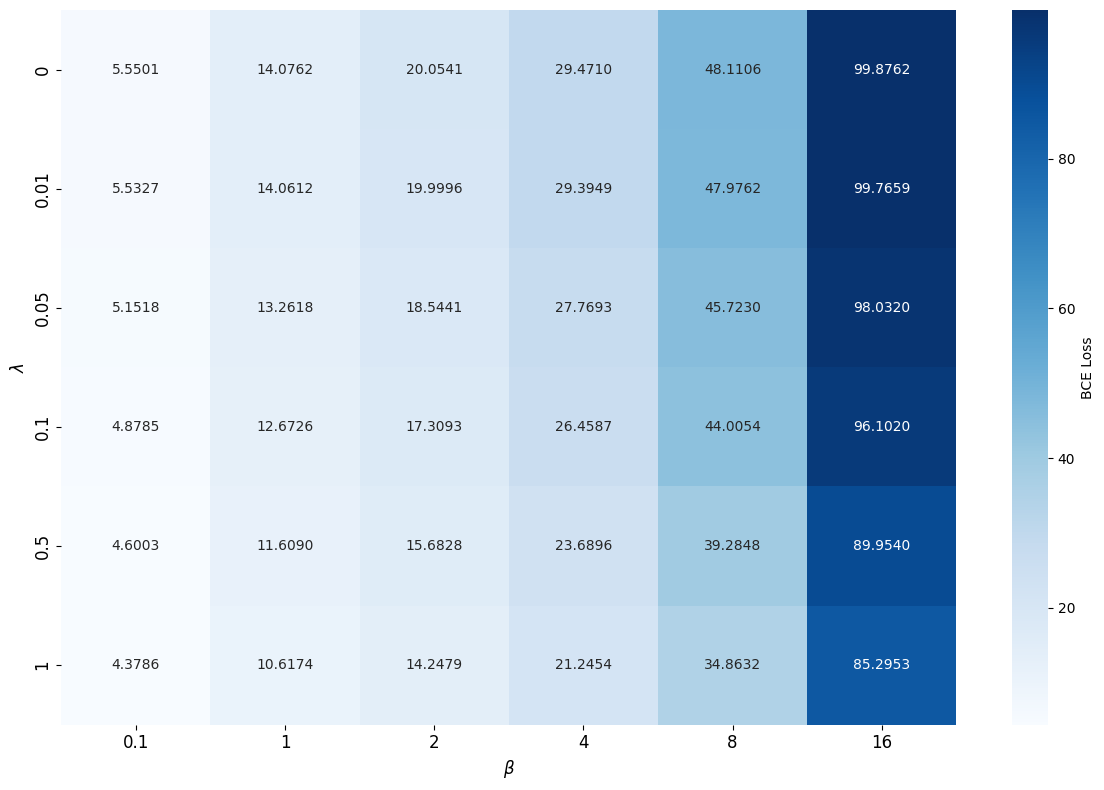

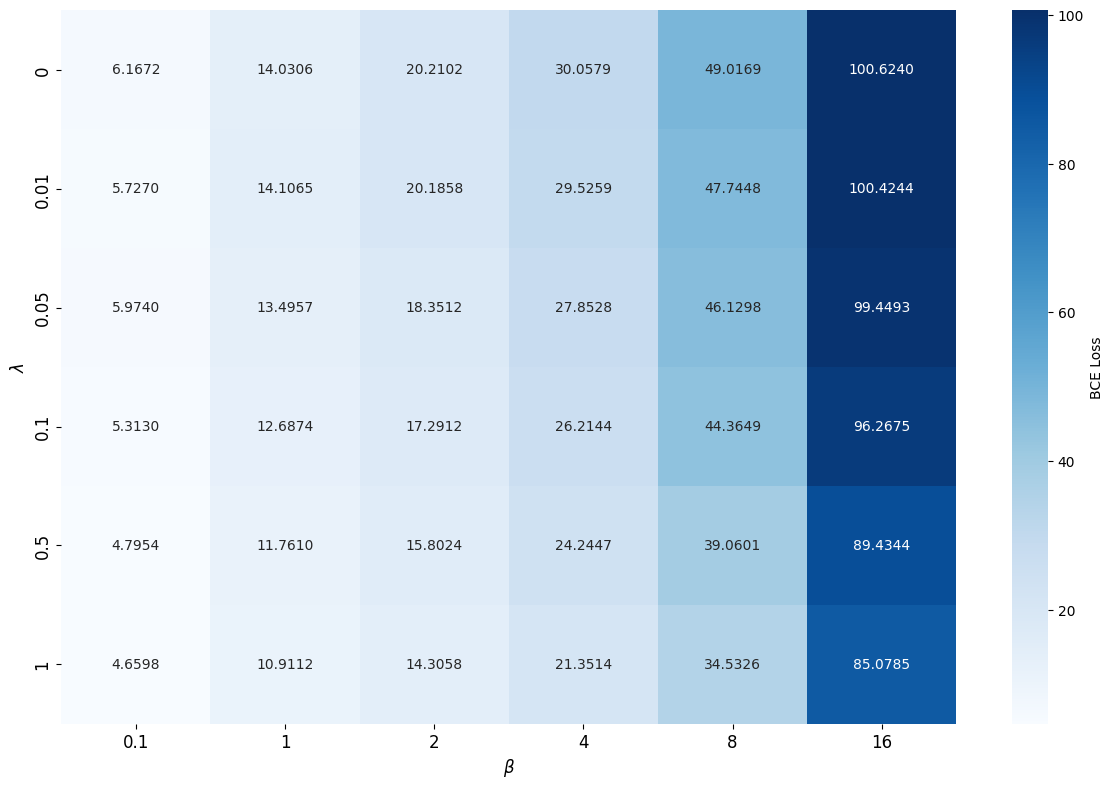

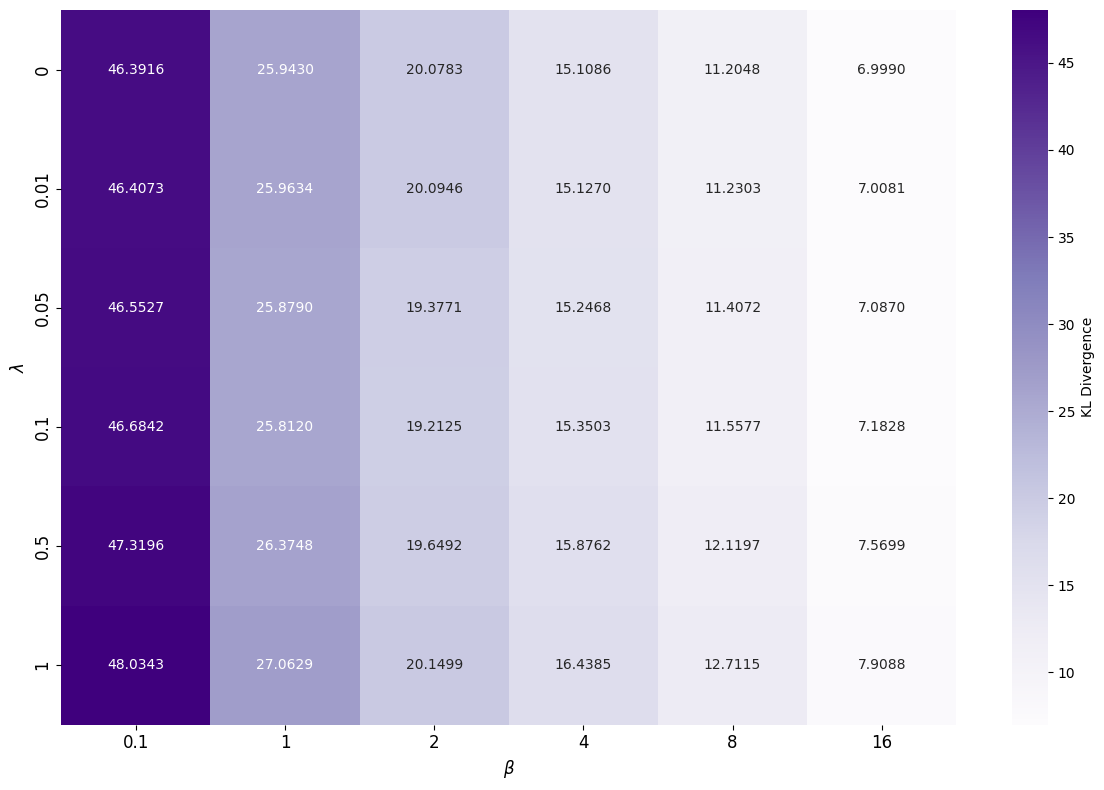

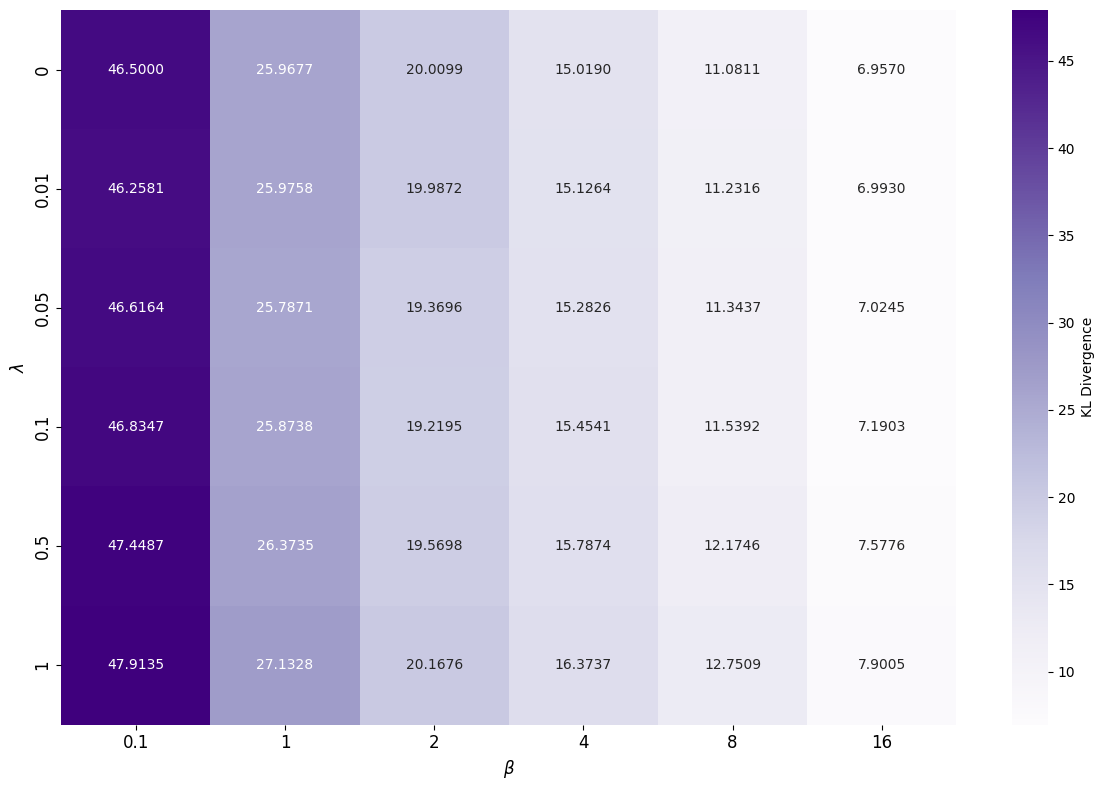

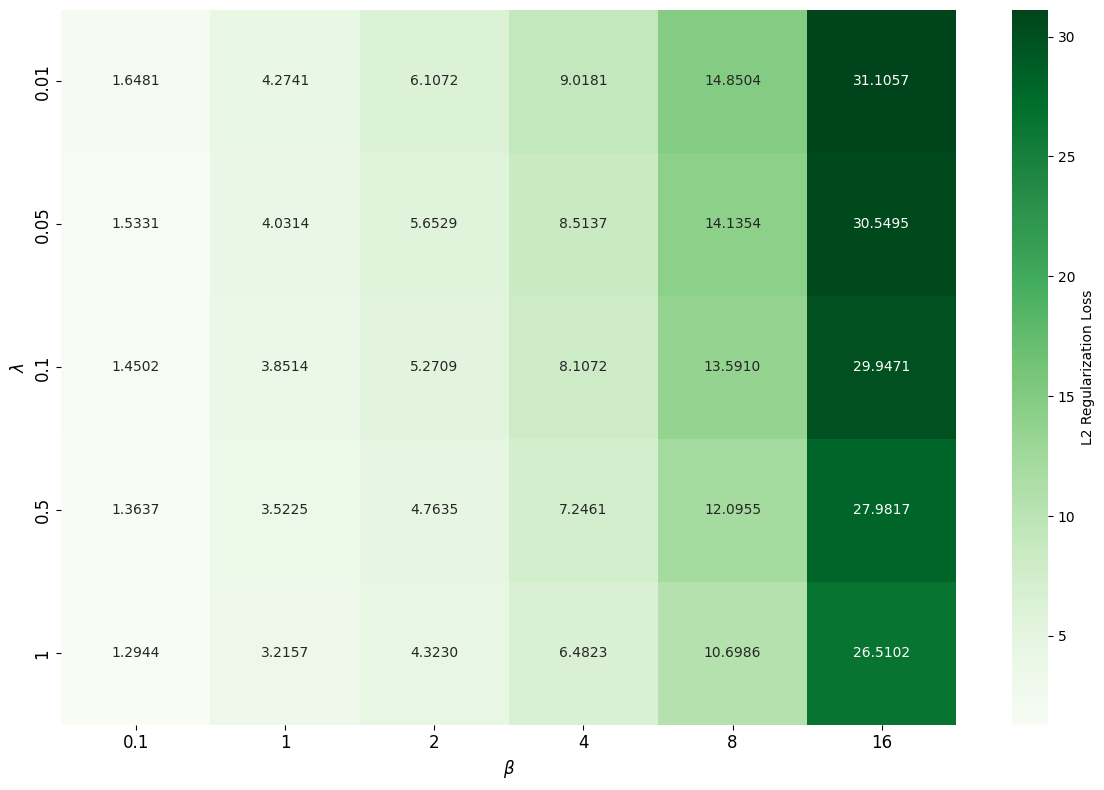

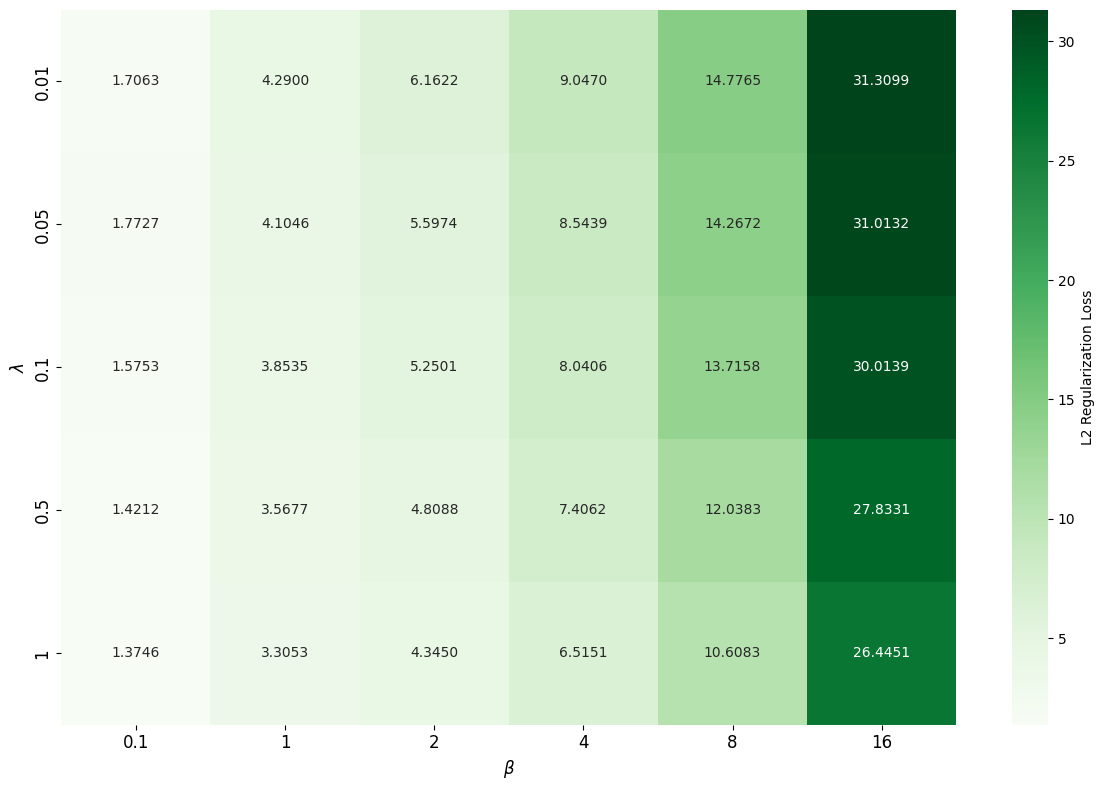

In [16]:
# Plot BCE loss heatmap
plot_custom_heatmap(
    train_bce_loss, 
    r'$\beta$', 
    r'$\lambda$', 
    BETAS, 
    LAMBDAS_0, 
    "train_bce_loss_heatmap.png", 
    cmap='Blues', 
    cbar_label='BCE Loss'
)

plot_custom_heatmap(
    val_bce_loss, 
    r'$\beta$', 
    r'$\lambda$', 
    BETAS, 
    LAMBDAS_0, 
    "val_bce_loss_heatmap.png", 
    cmap='Blues', 
    cbar_label='BCE Loss'
)

# Plot KL Divergence heatmap
plot_custom_heatmap(
    train_kl_loss, 
    r'$\beta$', 
    r'$\lambda$', 
    BETAS, 
    LAMBDAS_0, 
    "train_kl_loss_heatmap.png", 
    cmap='Purples', 
    cbar_label='KL Divergence'
)

plot_custom_heatmap(
    val_kl_loss, 
    r'$\beta$', 
    r'$\lambda$', 
    BETAS, 
    LAMBDAS_0, 
    "val_kl_loss_heatmap.png", 
    cmap='Purples', 
    cbar_label='KL Divergence'
)

# Plot L2 Loss heatmap
plot_custom_heatmap(
    train_l2_norm, 
    r'$\beta$', 
    r'$\lambda$', 
    BETAS, 
    LAMBDAS, 
    "train_l2_loss_heatmap.png", 
    cmap='Greens', 
    cbar_label='L2 Regularization Loss'
)

plot_custom_heatmap(
    val_l2_norm, 
    r'$\beta$', 
    r'$\lambda$', 
    BETAS, 
    LAMBDAS, 
    "val_l2_loss_heatmap.png", 
    cmap='Greens', 
    cbar_label='L2 Regularization Loss'
)

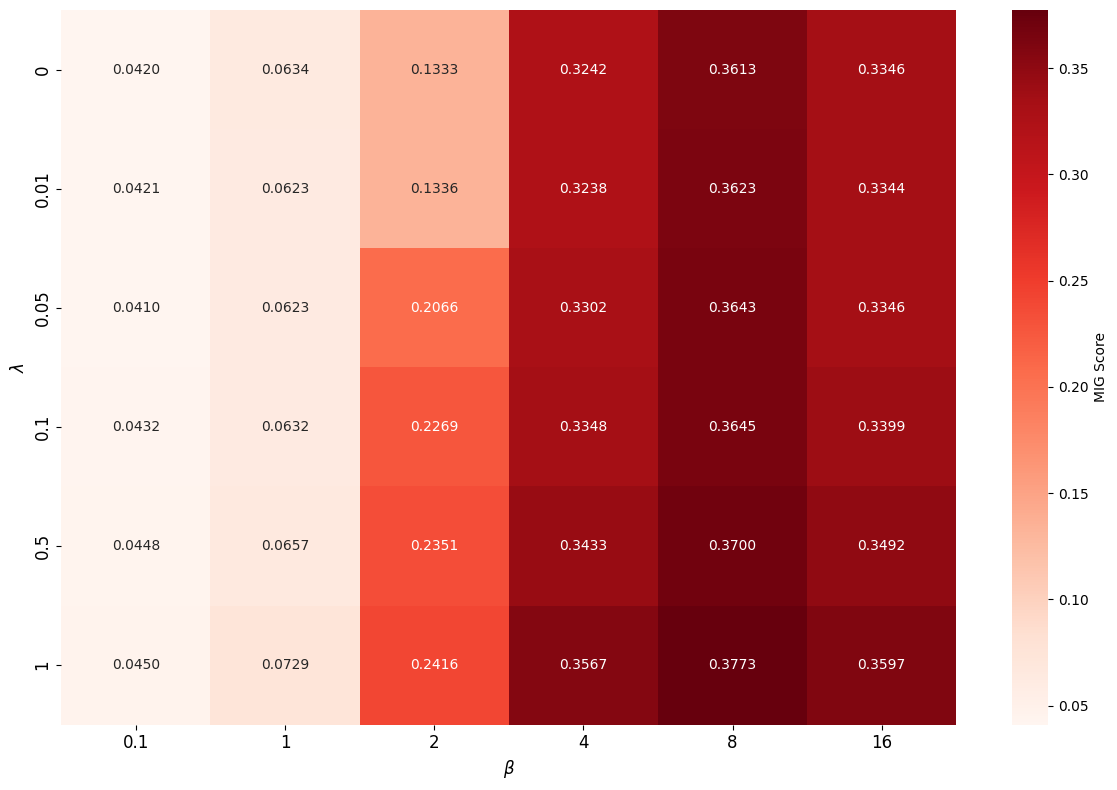

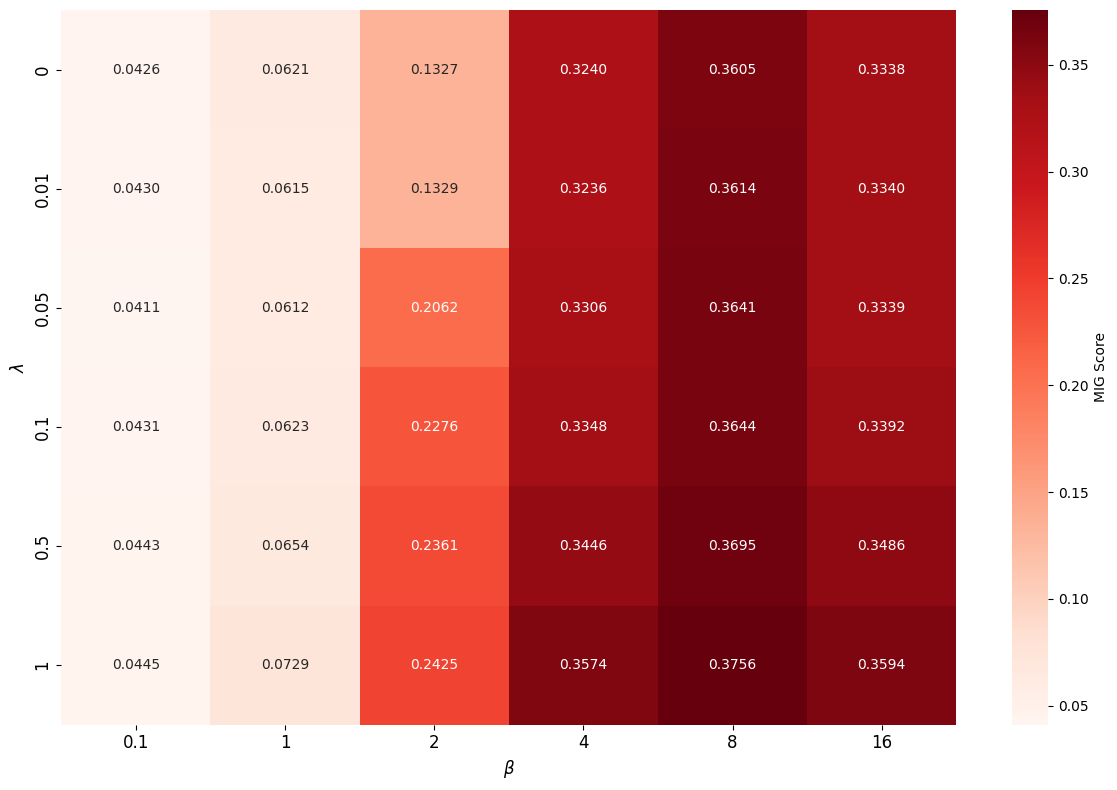

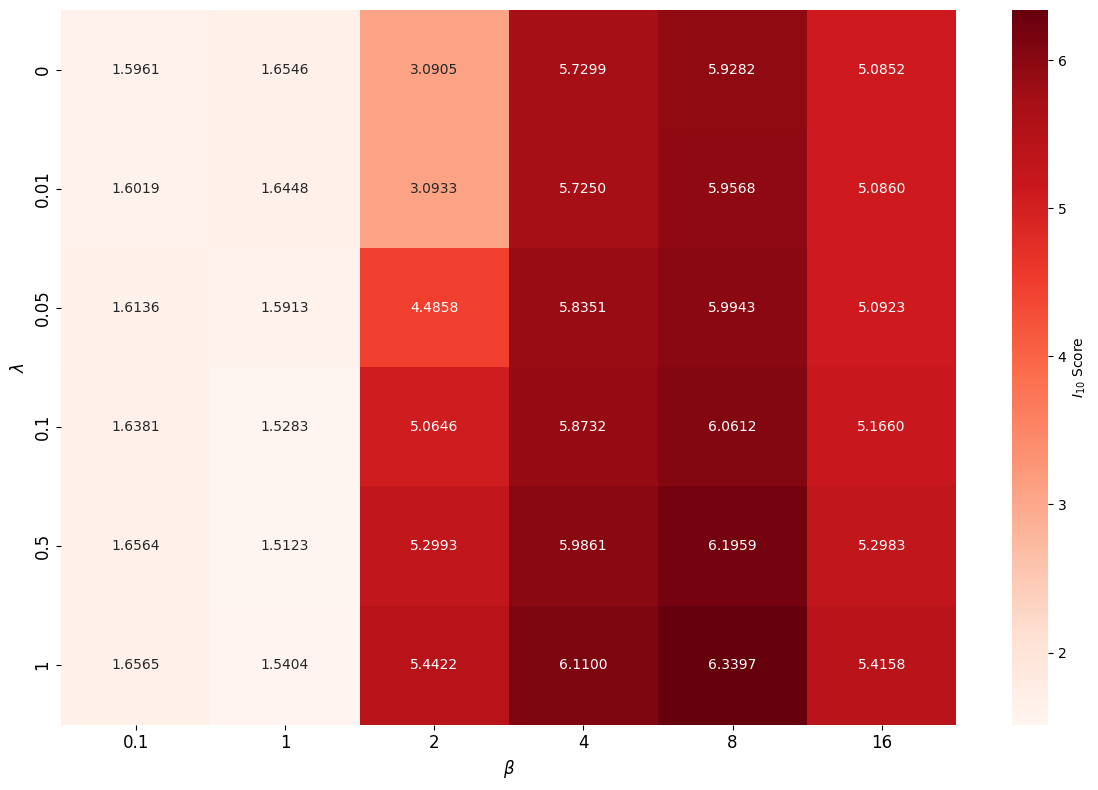

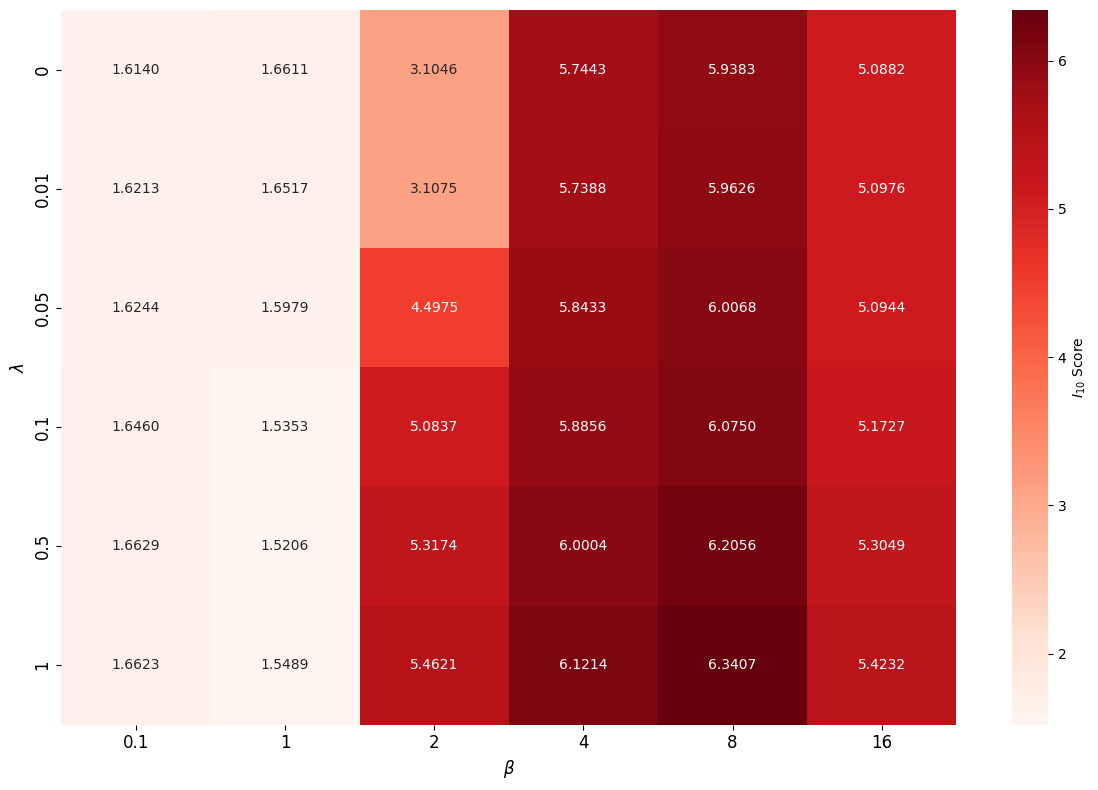

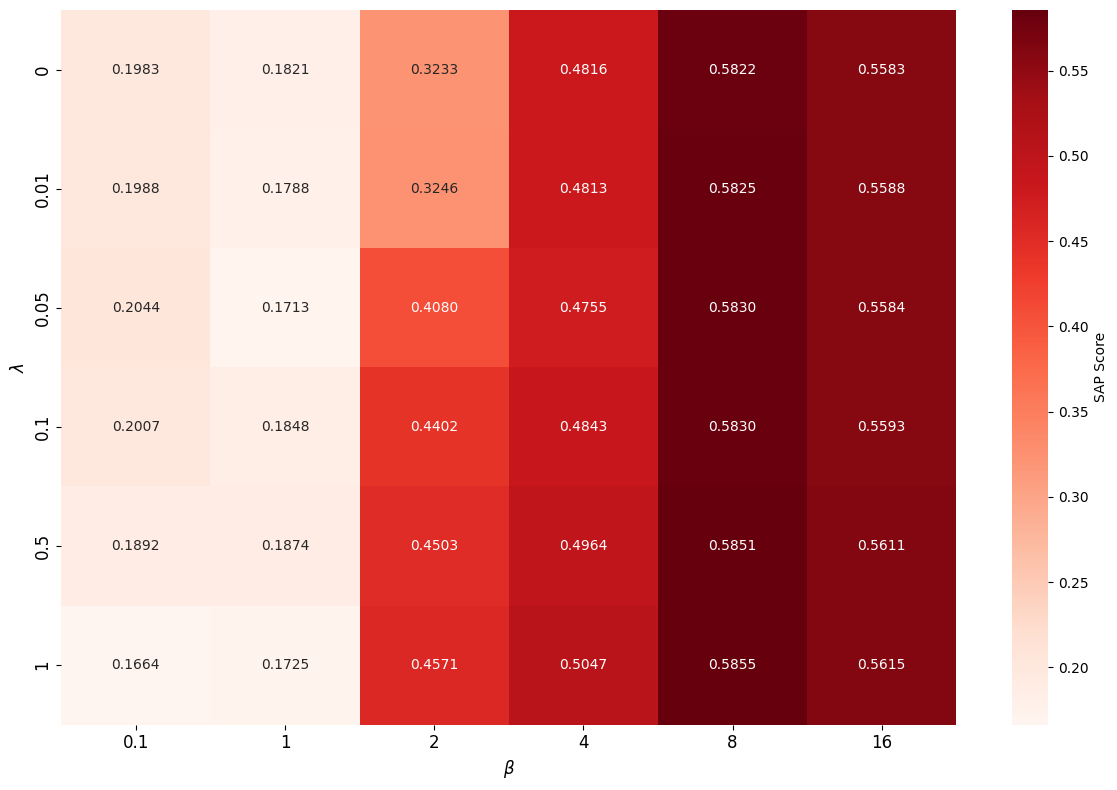

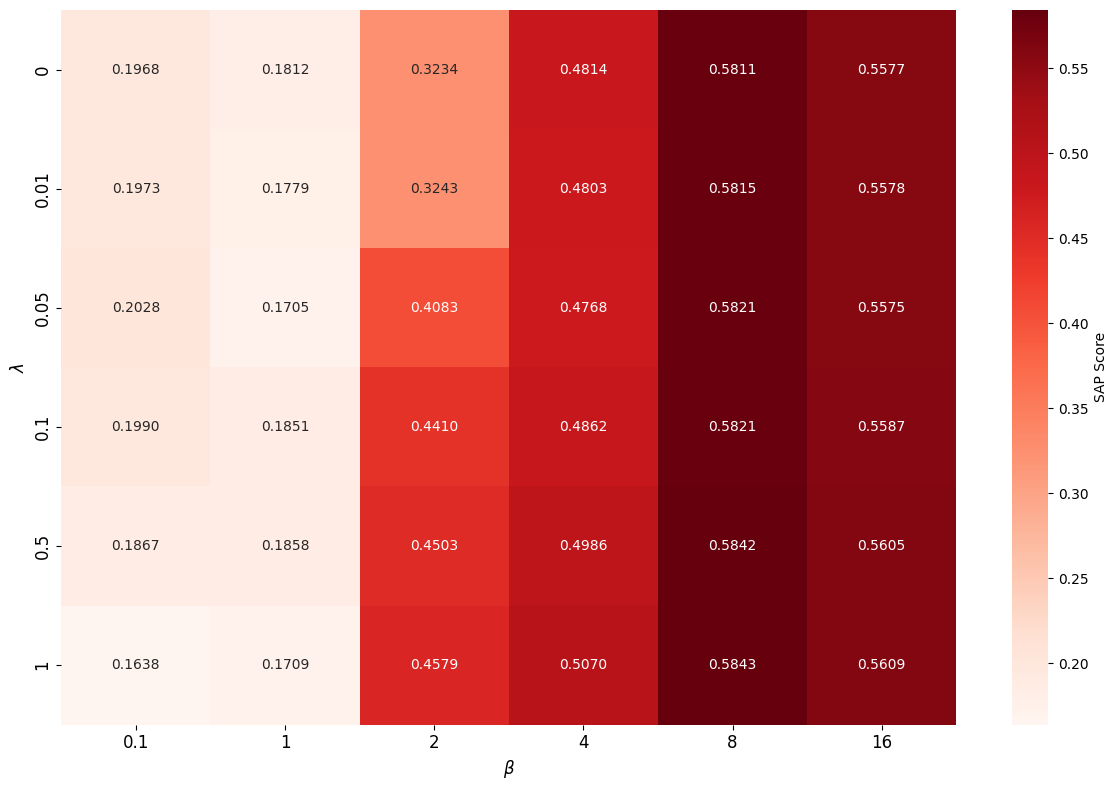

In [17]:
# Plot MIG score heatmap
plot_custom_heatmap(
    train_mig_score, 
    r'$\beta$', 
    r'$\lambda$', 
    BETAS, 
    LAMBDAS_0, 
    "train_mig_heatmap.png", 
    cmap='Reds', 
    cbar_label='MIG Score'
)

plot_custom_heatmap(
    val_mig_score, 
    r'$\beta$', 
    r'$\lambda$', 
    BETAS, 
    LAMBDAS_0,
    "val_mig_heatmap.png", 
    cmap='Reds', 
    cbar_label='MIG Score'
)

# Plot I10 score heatmap
plot_custom_heatmap(
    train_I10_score, 
    r'$\beta$', 
    r'$\lambda$', 
    BETAS, 
    LAMBDAS_0,
    "train_I10_heatmap.png", 
    cmap='Reds', 
    cbar_label=r'$I_{10}$ Score'
)

plot_custom_heatmap(
    val_I10_score, 
    r'$\beta$', 
    r'$\lambda$', 
    BETAS, 
    LAMBDAS_0, 
    "val_I10_heatmap.png", 
    cmap='Reds', 
    cbar_label=r'$I_{10}$ Score'
)

# Plot SAP score heatmap
plot_custom_heatmap(
    train_sap_score, 
    r'$\beta$', 
    r'$\lambda$', 
    BETAS, 
    LAMBDAS_0,
    "train_sap_heatmap.png", 
    cmap='Reds', 
    cbar_label='SAP Score'
)

plot_custom_heatmap(
    val_sap_score, 
    r'$\beta$', 
    r'$\lambda$', 
    BETAS, 
    LAMBDAS_0,
    "val_sap_heatmap.png", 
    cmap='Reds', 
    cbar_label='SAP Score'
)